In [3]:
from PIL import Image, ImageOps
import numpy as np
import networkx as nx
img_path = 'problem1_cat.png' # get this photo from Canvas. file name (or path if image isn't in the same directory)
img = Image.open(img_path) # define img using PIL
img = ImageOps.grayscale(img) # make the image grayscale 
img.show() # view image
img = np.array(img).astype(np.float32) # convert img to ndarray 
img = (img < 128).astype(int) # binarize the image 
print(img.shape)
h, w = img.shape # get height and width of the image

(18, 20)


In [4]:
img

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1,

## Define the graph

In [10]:
import numpy as np
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(dict)

    def add_edge(self, u, v, w): # w is the capacity of the flow
        self.graph[u][v] = w
        self.graph[v][u] = 0 # reverse the edge intialization

# create graph from the image
def create_graph_from_image(img, threshold=128):
    h, w = img.shape
    graph = Graph()

    for i in range(h):
        for j in range(w):
            current_pixel = (i, j)
            if img[i, j] == 1: # Only the foreground pixels are considered
                # Connect to the right neighbour
                if j + 1 < w and img[i, j + 1] == 1:
                    # weight = 1 / (1 + np.abs(img[i, j] - img[i, j + 1]))
                    graph.add_edge(current_pixel, (i, j + 1), 1)  # Static weight for testing 
                    # graph.add_edge(current_pixel, (i, j + 1), weight)

                    # Replace these lines in create_graph_from_image  
# weight = 1 / (1 + abs(int(img[i, j]) - int(img[i, j + 1])))  
 

# For bottom neighbor too:  
 # Static weight for testing

                # Connect to the bottom neighbour
                if i + 1 < h and img[i + 1, j] == 1:
                    # weight = 1 / (1 + np.abs(img[i, j] - img[i + 1, j]))
                    graph.add_edge(current_pixel, (i + 1, j), 1) 
                    # graph.add_edge(current_pixel, (i + 1, j), weight)

        return graph
    
create_graph_from_image(img)
    # h, w = img.shape
    # g = graph()
    # for i in range(h):
    #     for j in range(w):
    #         if img[i, j] == 1:
    #             g.add_edge('s', (i, j), 1)
    #             g.add_edge((i, j), 't', 1)
    #             for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
    #                 if 0 <= x < h and 0 <= y < w and img[x, y] == 1:
    #                     g.add_edge((i, j), (x, y), 1)
    # return g


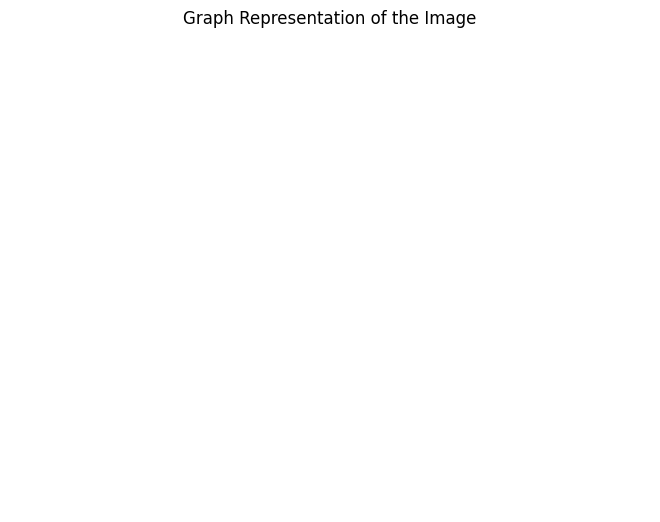

In [11]:
import matplotlib.pyplot as plt  
import networkx as nx  

def visualize_graph(graph):  
    G = nx.Graph()  
    
    # Add edges to the NetworkX graph  
    for u in graph.graph:  
        for v in graph.graph[u]:  
            G.add_edge(u, v, weight=graph.graph[u][v])  

    pos = {node: node for node in G.nodes()}  # Position nodes in a grid  
    nx.draw(G, pos, with_labels=True, node_size=200, node_color='lightblue', font_size=8)  
    edge_labels = nx.get_edge_attributes(G, 'weight')  
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  
    plt.title("Graph Representation of the Image")  
    plt.show()

graph = create_graph_from_image(img)
visualize_graph(graph)

In [9]:
def visualize_segmentation(img, segmented_pixels):  
    segmented_image = np.zeros_like(img)  # Initialize a black image  
    
    for (i, j) in segmented_pixels:  
        segmented_image[i, j] = 1  # Mark segmented pixels  

    plt.subplot(1, 2, 1)  
    plt.imshow(img, cmap='gray')  
    plt.title("Original Image")  

    plt.subplot(1, 2, 2)  
    plt.imshow(segmented_image, cmap='gray')  
    plt.title("Segmented Image")  

    plt.show()



In [51]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for each pixel
for i in range(h):
    for j in range(w):
        G.add_node((i, j))  # Pixel (i, j) is a node

# Add edges between neighboring pixels
for i in range(h):
    for j in range(w):
        if j + 1 < w:  # Connect right neighbor
            weight = abs(img[i, j] - img[i, j + 1])  # Pixel similarity
            G.add_edge((i, j), (i, j + 1), capacity=255 - weight) 

        if i + 1 < h:  # Connect bottom neighbor
            weight = abs(img[i, j] - img[i + 1, j])
            G.add_edge((i, j), (i + 1, j), capacity=255 - weight) 



source = 'S'
sink = 'T'

G.add_node(source)
G.add_node(sink)

# Connect background pixels (e.g., top-left) to source
for i in range(h):
    for j in range(w):
        if img[i, j] == 0:  # Background pixel (black)
            G.add_edge(source, (i, j), capacity=255) 

# Connect foreground pixels (e.g., center) to sink
for i in range(h//2 - 5, h//2 + 5):
    for j in range(w//2 - 5, w//2 + 5):
        if img[i, j] == 1:  # Foreground pixel (white)
            G.add_edge((i, j), sink, capacity=255)  




from collections import deque

def bfs(graph, source, sink, parent):
    """Find an augmenting path using BFS. Returns True if a path exists."""
    visited = set()
    queue = deque([source])
    visited.add(source)
    
    while queue:
        node = queue.popleft()
        
        for neighbor in graph[node]:  
            if neighbor not in visited and graph[node][neighbor]['capacity'] > 0:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = node  # Store path information
                
                if neighbor == sink:
                    return True  # Found a path to the sink
    return False

def ford_fulkerson(graph, source, sink):
    """Computes the maximum flow using the Ford-Fulkerson method."""
    max_flow = 0  
    parent = {}  # Stores the path

    while bfs(graph, source, sink, parent):
        # Find the minimum residual capacity in the found path
        path_flow = float('Inf')
        v = sink
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, graph[u][v]['capacity'])
            v = u
        
        # Update capacities in the residual graph
        v = sink
        while v != source:
            u = parent[v]
            graph[u][v]['capacity'] -= path_flow
            graph[v][u]['capacity'] += path_flow  # Add reverse flow
            v = u
        
        max_flow += path_flow  # Add to total flow
    
    return max_flow




def min_cut(graph, source):
    """Finds the reachable nodes from the source after max flow computation."""
    visited = set()
    queue = deque([source])
    visited.add(source)

    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited and graph[node][neighbor]['capacity'] > 0:
                queue.append(neighbor)
                visited.add(neighbor)
    
    return visited  # This contains pixels belonging to the "source segment"


In [52]:
# Compute max flow
max_flow_value = ford_fulkerson(G, source, sink)
print("Maximum Flow:", max_flow_value)

# Find segmented pixels
source_segment = min_cut(G, source)

# Create output segmentation
segmented_img = np.zeros((h, w), dtype=int)
for i in range(h):
    for j in range(w):
        if (i, j) in source_segment:
            segmented_img[i, j] = 1  # Foreground

# Display segmented image
import matplotlib.pyplot as plt

plt.imshow(segmented_img, cmap='gray')
plt.title("Segmented Image")
plt.show()


KeyboardInterrupt: 

In [4]:
import numpy as np
from PIL import Image, ImageOps
import networkx as nx

def image_to_graph(img_path):
    # Load and preprocess the image
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)  # Convert to grayscale
    img = np.array(img).astype(np.float32)  # Convert to NumPy array

    h, w = img.shape  # Get image dimensions
    graph = nx.Graph()  # Initialize graph

    # Iterate over each pixel and create edges to neighbors
    for i in range(h):
        for j in range(w):
            node = (i, j)  # Each pixel is a node
            
            # Connect to right neighbor
            if j + 1 < w:
                weight = abs(img[i, j] - img[i, j + 1])  # Edge weight
                graph.add_edge(node, (i, j + 1), weight=weight)
            
            # Connect to bottom neighbor
            if i + 1 < h:
                weight = abs(img[i, j] - img[i + 1, j])  # Edge weight
                graph.add_edge(node, (i + 1, j), weight=weight)
    
    return graph

In [5]:
img_path = 'problem1_cat.png'
g = image_to_graph(img_path)
print(g.number_of_nodes(), g.number_of_edges())

360 682


In [6]:
# Functio to read the image and create a graph
def create_graph(img):
    G = nx.Graph()
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            if img[i, j] == 1:
                G.add_node((i, j))
                if i > 0 and img[i-1, j] == 1:
                    G.add_edge((i, j), (i-1, j), weight=1)
                if j > 0 and img[i, j-1] == 1:
                    G.add_edge((i, j), (i, j-1), weight=1)
    return G

In [23]:
H = create_graph(img)
print(H.number_of_nodes(), H.number_of_edges())

94 163


#### vISUAL

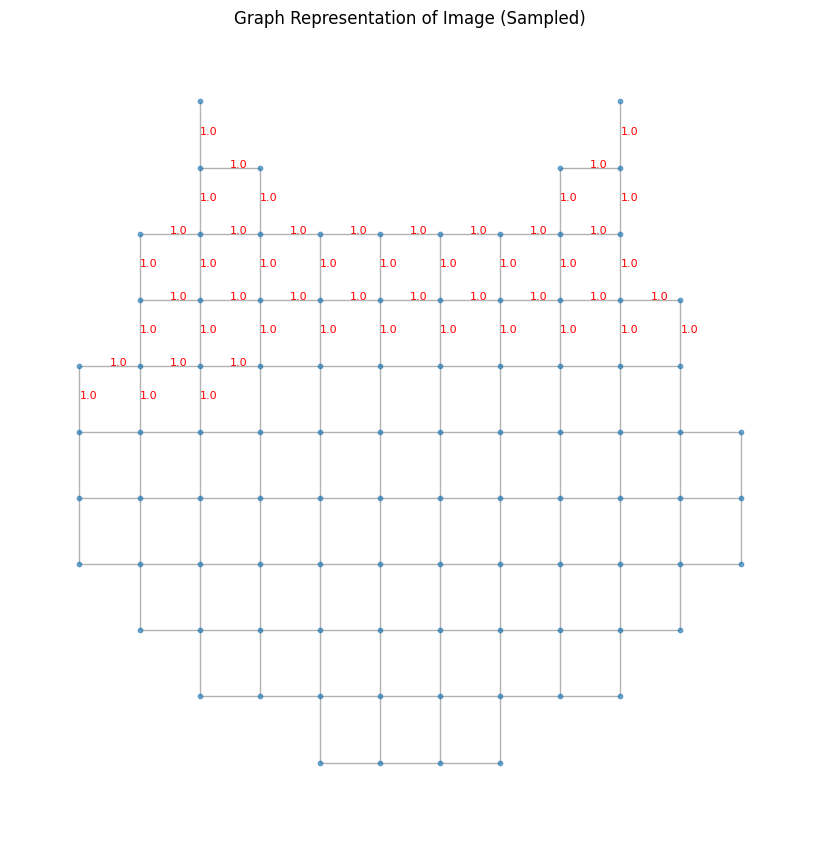

In [24]:
import matplotlib.pyplot as plt

def visualize_graph(graph, sample_size=20):
    """Visualizes a small portion of the graph to verify correctness."""
    plt.figure(figsize=(8, 8))
    pos = {node: (node[1], -node[0]) for node in graph.nodes()}  # Flip y-axis for proper image orientation
    edges = list(graph.edges(data=True))[:sample_size]  # Take a small sample of edges
    
    # Draw nodes
    nx.draw(graph, pos, node_size=10, edge_color="gray", alpha=0.6)
    
    # Draw edges with weights
    for edge in edges:
        node1, node2, data = edge
        weight = data["weight"]
        plt.text((pos[node1][0] + pos[node2][0]) / 2, 
                 (pos[node1][1] + pos[node2][1]) / 2, 
                 f"{weight:.1f}", fontsize=8, color="red")
    
    plt.title("Graph Representation of Image (Sampled)")
    plt.show()

# Load image as a graph
# img_path = "cat.png"  # Make sure the image is available
# graph = image_to_graph(img_path)
graph = create_graph(img)

# Visualize a small portion of the graph
visualize_graph(graph, sample_size=50)


In [32]:
graph = create_graph(img)
graph

### Ford-Fulkerson

In [25]:
from collections import deque

def bfs(graph, source, sink, parent):
    """Finds an augmenting path using BFS. Returns True if a path exists."""
    visited = set()
    queue = deque([source])
    visited.add(source)

    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited and graph[node][neighbor]["capacity"] > 0:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = node
                if neighbor == sink:
                    return True  # Path to sink found
    return False  # No path exists


In [26]:
def ford_fulkerson(graph, source, sink):
    """Computes the maximum flow using Ford-Fulkerson algorithm."""
    residual_graph = graph.copy()
    max_flow = 0
    parent = {}  # Store path

    while bfs(residual_graph, source, sink, parent):
        # Find the maximum flow through the path found by BFS
        path_flow = float("Inf")
        s = sink
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s]["capacity"])
            s = parent[s]

        # Update residual capacities of the edges and reverse edges
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v]["capacity"] -= path_flow
            residual_graph[v][u]["capacity"] += path_flow  # Reverse edge
            v = parent[v]

        max_flow += path_flow  # Add path flow to total flow

    return max_flow, residual_graph


In [28]:
# Select manualy the source and sink nodes
def select_source_sink_manual(img):
    """Manually selects source and sink pixels for segmentation."""
    h, w = img.shape
    source = (0, 0)  # Top-left pixel as background (S)
    sink = (h // 2, w // 2)  # Center pixel as foreground (T)
    return source, sink

source_manual, sink_manual = select_source_sink_manual(img)
max_flow_manual, residual_graph_manual = ford_fulkerson(graph, source_manual, sink_manual)
print(f"Manual Selection -> Max Flow: {max_flow_manual}")



KeyError: (0, 0)

In [29]:
def select_source_sink_auto(img):
    """Automatically selects source and sink pixels based on intensity."""
    h, w = img.shape
    darkest_pixels = np.argwhere(img == np.min(img))  # Pixels with min intensity
    brightest_pixels = np.argwhere(img == np.max(img))  # Pixels with max intensity

    source = tuple(darkest_pixels[0])  # First darkest pixel
    sink = tuple(brightest_pixels[0])  # First brightest pixel

    return source, sink

source_auto, sink_auto = select_source_sink_auto(img)
max_flow_auto, residual_graph_auto = ford_fulkerson(graph, source_auto, sink_auto)
print(f"Automatic Selection -> Max Flow: {max_flow_auto}")

KeyError: (np.int64(0), np.int64(0))

### Solution


In [44]:
def create_graph_with_capacity(img):
    """Creates a graph from a binary image with capacities for Ford-Fulkerson."""
    G = nx.DiGraph()  # Use a Directed Graph for flow calculation
    h, w = img.shape
    
    for i in range(h):
        for j in range(w):
            if img[i, j] == 1:  # Only add foreground pixels
                G.add_node((i, j))
                if i > 0 and img[i-1, j] == 1:
                    G.add_edge((i, j), (i-1, j), capacity=1)
                if j > 0 and img[i, j-1] == 1:
                    G.add_edge((i, j), (i, j-1), capacity=1)
    
    return G

In [45]:
graph = create_graph_with_capacity(img)

In [46]:
if source_manual not in graph:
    print(f"Error: Source {source_manual} is not in the graph!")

if sink_manual not in graph:
    print(f"Error: Sink {sink_manual} is not in the graph!")

print(f"Neighbors of Source {source_manual}: {list(graph[source_manual])}")
print(f"Neighbors of Sink {sink_manual}: {list(graph[sink_manual])}")


Error: Source (0, 0) is not in the graph!


KeyError: (0, 0)

In [33]:
graph = create_graph_with_capacity(img)

# Verify source/sink exist
if source_manual not in graph:
    print(f"Error: Source {source_manual} is not in the graph!")
if sink_manual not in graph:
    print(f"Error: Sink {sink_manual} is not in the graph!")

# Run Ford-Fulkerson
max_flow_manual, residual_graph_manual = ford_fulkerson(graph, source_manual, sink_manual)
print(f"Manual Selection -> Max Flow: {max_flow_manual}")


Error: Source (0, 0) is not in the graph!


KeyError: (0, 0)

In [34]:
def select_valid_source_sink(img):
    """Finds a valid foreground pixel as the source and sink."""
    h, w = img.shape
    foreground_pixels = np.argwhere(img == 1)  # Find all foreground pixels

    if len(foreground_pixels) < 2:
        raise ValueError("Not enough foreground pixels to define source and sink!")

    source = tuple(foreground_pixels[0])  # First foreground pixel as source
    sink = tuple(foreground_pixels[-1])   # Last foreground pixel as sink

    return source, sink


In [35]:
source_fixed, sink_fixed = select_valid_source_sink(img)

# Verify source/sink exist in the graph
if source_fixed not in graph:
    print(f"Error: Source {source_fixed} is not in the graph!")
if sink_fixed not in graph:
    print(f"Error: Sink {sink_fixed} is not in the graph!")

# Run Ford-Fulkerson
max_flow_fixed, residual_graph_fixed = ford_fulkerson(graph, source_fixed, sink_fixed)
print(f"Fixed Selection -> Max Flow: {max_flow_fixed}")


Fixed Selection -> Max Flow: 0


In [36]:
if not nx.has_path(graph, source_fixed, sink_fixed):
    print(f"Warning: No path between source {source_fixed} and sink {sink_fixed}!")



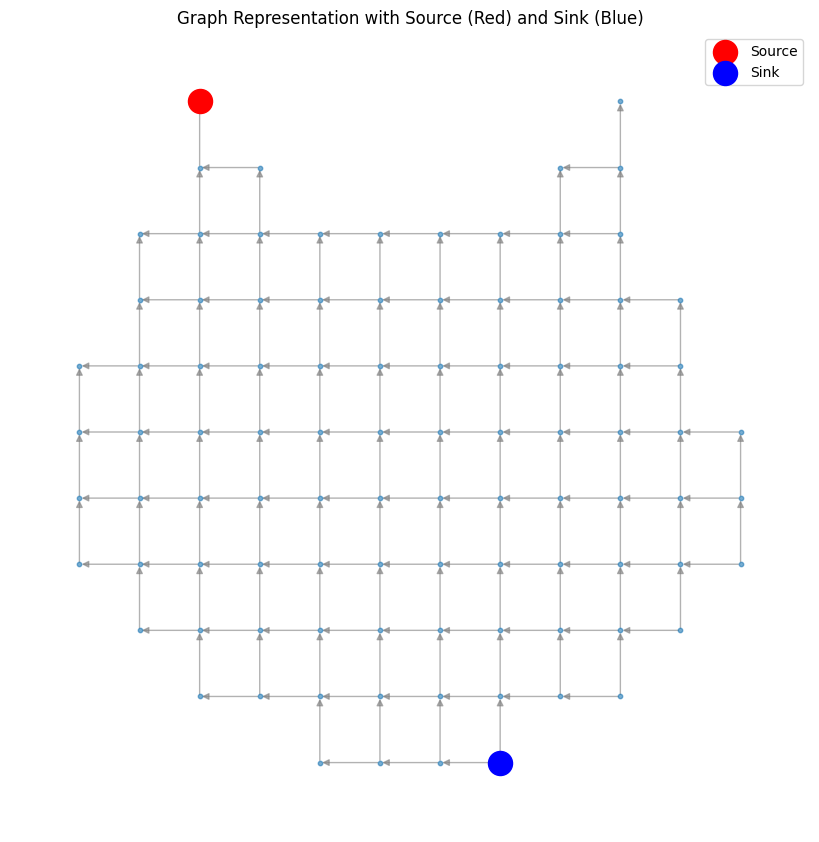

In [37]:
import matplotlib.pyplot as plt

def visualize_graph_with_source_sink(graph, source, sink, sample_size=50):
    plt.figure(figsize=(8, 8))
    pos = {node: (node[1], -node[0]) for node in graph.nodes()}  # Flip y-axis

    nx.draw(graph, pos, node_size=10, edge_color="gray", alpha=0.6)
    nx.draw_networkx_nodes(graph, pos, nodelist=[source], node_color="red", label="Source")
    nx.draw_networkx_nodes(graph, pos, nodelist=[sink], node_color="blue", label="Sink")

    plt.legend()
    plt.title("Graph Representation with Source (Red) and Sink (Blue)")
    plt.show()

visualize_graph_with_source_sink(graph, source_fixed, sink_fixed)


In [38]:
print(f"Neighbors of Source {source_fixed}: {list(graph.neighbors(source_fixed))}")
print(f"Neighbors of Sink {sink_fixed}: {list(graph.neighbors(sink_fixed))}")



Neighbors of Source (np.int64(4), np.int64(6)): []
Neighbors of Sink (np.int64(14), np.int64(11)): [(13, 11), (14, 10)]


## Start

In [12]:
from collections import deque  

def bfs(capacity, source, sink, parent):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            # If not visited and there's capacity left for flow  
            if not visited[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited[v] = True  
                parent[v] = u  # Track the path  

                # If we reach the sink, we can stop early  
                if v == sink:  
                    return True  
    
    return False

In [13]:
def ford_fulkerson(capacity, source, sink):  
    parent = [-1] * len(capacity)  # To store the path  
    max_flow = 0  # Initialize the flow  

    while bfs(capacity, source, sink, parent):  
        # Find the maximum flow through the path found by BFS  
        path_flow = float('Inf')  
        s = sink  

        while s != source:  
            path_flow = min(path_flow, capacity[parent[s]][s])  
            s = parent[s]  

        # update capacities of the edges and reverse edges along the path  
        v = sink  
        while v != source:  
            u = parent[v]  
            capacity[u][v] -= path_flow  # Reduce capacity in the forward direction  
            capacity[v][u] += path_flow  # Increase capacity in the reverse direction  
            v = parent[v]  

        max_flow += path_flow  # Add flow to overall flow  

    return max_flow

In [16]:
import numpy as np  

def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    def pixel_index(x, y):  
        return x * width + y  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j)  

            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  

    return capacity

In [17]:
def define_source_sink(image):  
    height, width = image.shape  
    # Source is a corner pixel, e.g., top-left corner  
    source = 0  # Assuming the top-left pixel corresponds to index 0  

    # Sink is a center pixel  
    if width % 2 == 1 and height % 2 == 1:  
        sink = pixel_index(height // 2, width // 2)  
    else:  
        sink = pixel_index(height // 2, width // 2)  # Can adjust for even dimensions if needed.  

    return source, sink

In [18]:
from PIL import Image, ImageOps  
import numpy as np  
import networkx as nx  
from collections import deque  

# Step 1: Loading and processing image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the image  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
img = (img < 128).astype(int)  # Binarize the image  
print(img.shape)  
h, w = img.shape  # Get height and width  

# Step 2: Define pixel index function  
def pixel_index(x, y):  
    return x * w + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement BFS  
def bfs(capacity, source, sink, parent):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if not visited[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited[v] = True  
                parent[v] = u  
                
                if v == sink:  
                    return True  
    
    return False  

# Step 5: Implement Ford-Fulkerson algorithm  
def ford_fulkerson(capacity, source, sink):  
    parent = [-1] * len(capacity)  
    max_flow = 0  

    while bfs(capacity, source, sink, parent):  
        # Find the maximum flow through the path found by BFS  
        path_flow = float('Inf')  
        s = sink  

        while s != source:  
            path_flow = min(path_flow, capacity[parent[s]][s])  
            s = parent[s]  

        # update capacities of the edges and reverse edges along the path  
        v = sink  
        while v != source:  
            u = parent[v]  
            capacity[u][v] -= path_flow  
            capacity[v][u] += path_flow  
            v = parent[v]  

        max_flow += path_flow  

    return max_flow  

# Step 6: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = 0  # Top-left corner  
    sink = pixel_index(height // 2, width // 2)  # Center pixel  
    return source, sink  

# Main execution  
if __name__ == "__main__":  
    capacity = image_to_graph(img)  # Convert the image to a graph  
    source, sink = define_source_sink(img)  # Define source and sink  
    max_flow = ford_fulkerson(capacity, source, sink)  # Run Ford-Fulkerson  
    
    print(f"Maximum flow (segmentation result): {max_flow}")

(18, 20)
Maximum flow (segmentation result): 2.0


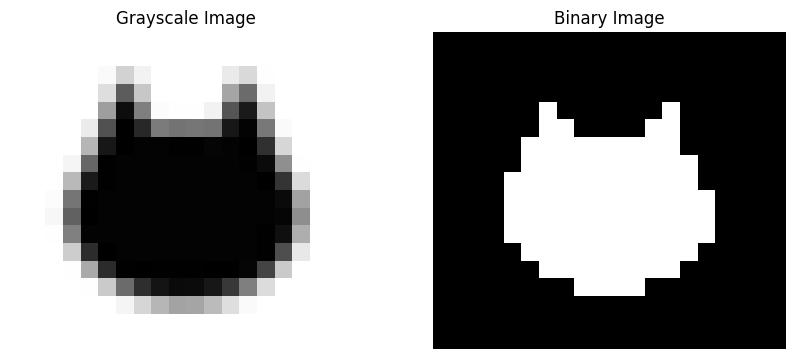

Maximum flow (segmentation result): 2.0
Nodes reachable from the source:
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fal

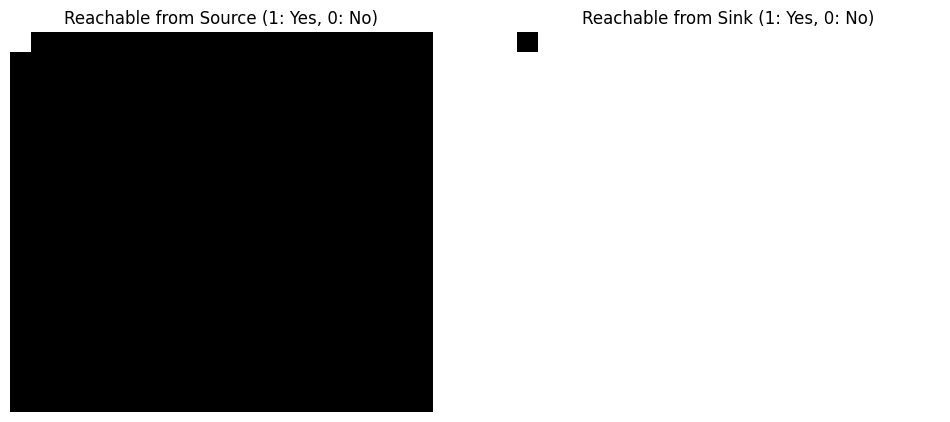

In [19]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Loading and processing image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the grayscale image  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image  
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y):  
    return x * w + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement BFS  
def bfs(capacity, source, sink, parent):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if not visited[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited[v] = True  
                parent[v] = u  
                
                if v == sink:  
                    return True  
    
    return False  

# Step 5: Implement Ford-Fulkerson algorithm  
def ford_fulkerson(capacity, source, sink):  
    parent = [-1] * len(capacity)  
    max_flow = 0  

    while bfs(capacity, source, sink, parent):  
        # Find the maximum flow through the path found by BFS  
        path_flow = float('Inf')  
        s = sink  

        while s != source:  
            path_flow = min(path_flow, capacity[parent[s]][s])  
            s = parent[s]  

        # update capacities of the edges and reverse edges along the path  
        v = sink  
        while v != source:  
            u = parent[v]  
            capacity[u][v] -= path_flow  
            capacity[v][u] += path_flow  
            v = parent[v]  

        max_flow += path_flow  

    return max_flow  

# Step 6: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = 0  # Top-left corner  
    sink = pixel_index(height // 2, width // 2)  # Center pixel  
    return source, sink  

# Step 7: Find reachable nodes from source and sink  
def find_reachable(capacity, source, sink):  
    visited_from_source = [False] * len(capacity)  
    visited_from_sink = [False] * len(capacity)  

    # BFS from source  
    queue = deque([source])  
    visited_from_source[source] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_source[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited_from_source[v] = True  

    # BFS from sink  
    queue = deque([sink])  
    visited_from_sink[sink] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_sink[v] and capacity[v][u] > 0:  # Use residual capacities  
                queue.append(v)  
                visited_from_sink[v] = True  

    return visited_from_source, visited_from_sink  

# Main execution  
if __name__ == "__main__":  
    binary_img = (img < 128).astype(int)  # Binarize the image again if needed  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sink = define_source_sink(binary_img)  # Define source and sink  
    max_flow = ford_fulkerson(capacity, source, sink)  # Run Ford-Fulkerson  

    print(f"Maximum flow (segmentation result): {max_flow}")  

    # Step 8: Find reachable nodes  
    reachable_from_source, reachable_from_sink = find_reachable(capacity, source, sink)  

    # Display reachable nodes  
    print("Nodes reachable from the source:")  
    print(reachable_from_source)  

    print("\nNodes reachable from the sink:")  
    print(reachable_from_sink)  

    # You can visualize the reachable nodes if you want  
    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Reachable from Source (1: Yes, 0: No)')  
    plt.imshow(np.array(reachable_from_source).reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Reachable from Sink (1: Yes, 0: No)')  
    plt.imshow(np.array(reachable_from_sink).reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  

    plt.show()

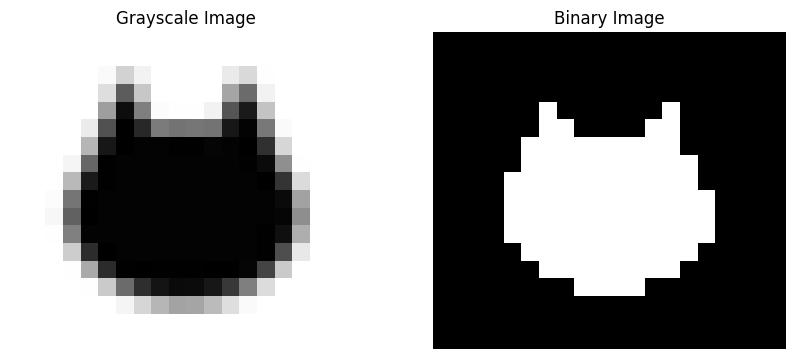

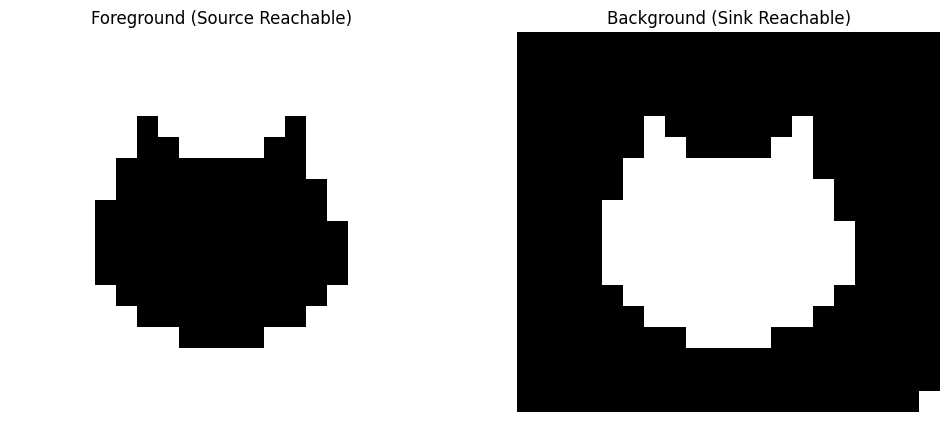

In [1]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Load and process image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the grayscale image  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image (0=black, 1=white)  
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y, width):  
    return x * width + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j, width)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = pixel_index(0, 0, width)  # Top-left corner  
    sink1 = pixel_index(height // 2, width // 2, width)  # Center pixel  
    sink2 = pixel_index(height - 1, width - 1, width)  # Bottom-right corner  
    return source, [sink1, sink2]  

# Step 5: Find reachable nodes  
def find_reachable(capacity, source, sinks, binary_img):  
    num_nodes = len(capacity)  
    visited_from_source = [False] * num_nodes  
    visited_from_sink = [False] * num_nodes  

    # BFS from source (foreground pixels only)  
    queue = deque([source])  
    visited_from_source[source] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(num_nodes):  
            if not visited_from_source[v] and capacity[u][v] > 0 and binary_img.flatten()[v] == 0:  # Only black pixels  
                queue.append(v)  
                visited_from_source[v] = True  

    # BFS from sinks (background pixels only)  
    for sink in sinks:  
        queue = deque([sink])  
        visited_from_sink[sink] = True  
        while queue:  
            u = queue.popleft()  
            for v in range(num_nodes):  
                if not visited_from_sink[v] and capacity[v][u] > 0 and binary_img.flatten()[v] == 1:  # Only white pixels  
                    queue.append(v)  
                    visited_from_sink[v] = True  

    return visited_from_source, visited_from_sink  

# Main execution  
if __name__ == "__main__":  
    binary_img = (img < 128).astype(int)  # Binarize the image again if needed  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sinks = define_source_sink(binary_img)  # Define source and sinks  
    reachable_from_source, reachable_from_sink = find_reachable(capacity, source, sinks, binary_img)  

    # Display segmentation results  
    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Foreground (Source Reachable)')  
    plt.imshow(np.array(reachable_from_source).reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Background (Sink Reachable)')  
    plt.imshow(np.array(reachable_from_sink).reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  

    plt.show()


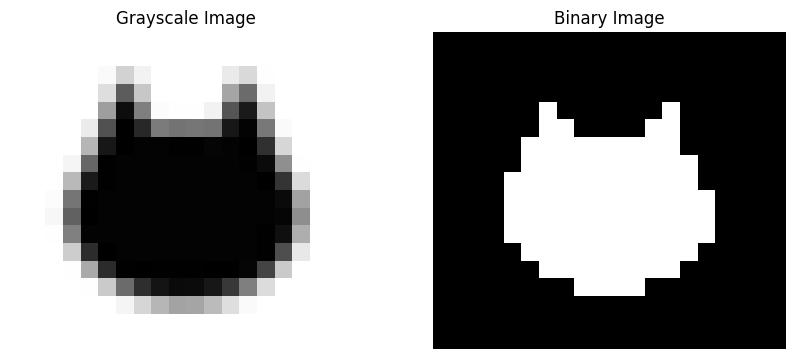

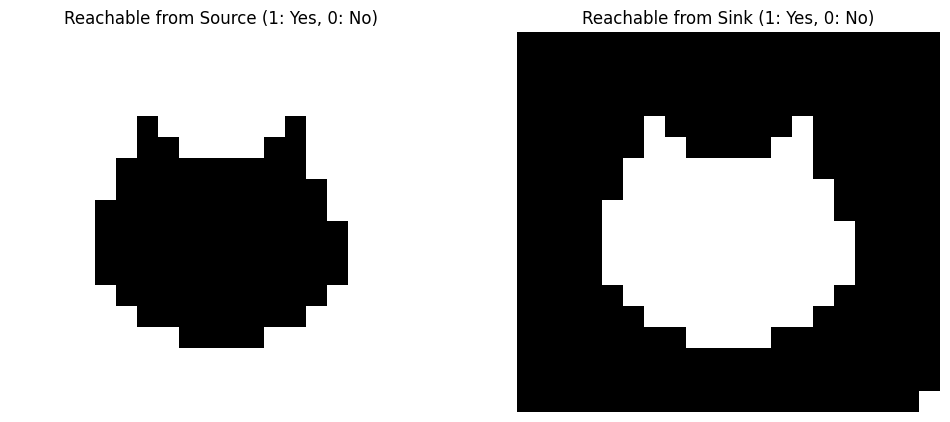

In [1]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Loading and processing image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the grayscale image  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image  
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y, width):  
    return x * width + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j, width)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement BFS  
def bfs(capacity, source, valid_nodes):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if not visited[v] and capacity[u][v] > 0 and v in valid_nodes:  
                queue.append(v)  
                visited[v] = True  
    
    return visited  

# Step 5: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = pixel_index(0, 0, width)  # Top-left corner  
    extra_source = pixel_index(height - 1, 0, width)  # Far left corner of the image frame  
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel  
    extra_sink = pixel_index(height - 1, width - 1, width)  # Far right bottom corner  
    return source, extra_source, sink, extra_sink  

# Main execution  
if __name__ == "__main__":  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, extra_source, sink, extra_sink = define_source_sink(binary_img)  # Define sources and sinks  

    # Get valid foreground (black) and background (white) nodes  
    foreground_nodes = set(np.where(binary_img.flatten() == 0)[0])  
    background_nodes = set(np.where(binary_img.flatten() == 1)[0])  
    
    # Compute reachability  
    reachable_from_source = bfs(capacity, source, foreground_nodes)  
    extra_reachable_from_source = bfs(capacity, extra_source, foreground_nodes)  
    reachable_from_sink = bfs(capacity, sink, background_nodes)  
    extra_reachable_from_sink = bfs(capacity, extra_sink, background_nodes)  

    # Combine reachability results  
    final_reachable_source = np.array(reachable_from_source) | np.array(extra_reachable_from_source)  
    final_reachable_sink = np.array(reachable_from_sink) | np.array(extra_reachable_from_sink)  

    # Display reachable nodes  
    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Reachable from Source (1: Yes, 0: No)')  
    plt.imshow(final_reachable_source.reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Reachable from Sink (1: Yes, 0: No)')  
    plt.imshow(final_reachable_sink.reshape(binary_img.shape), cmap='gray')  
    plt.axis('off')  

    plt.show()

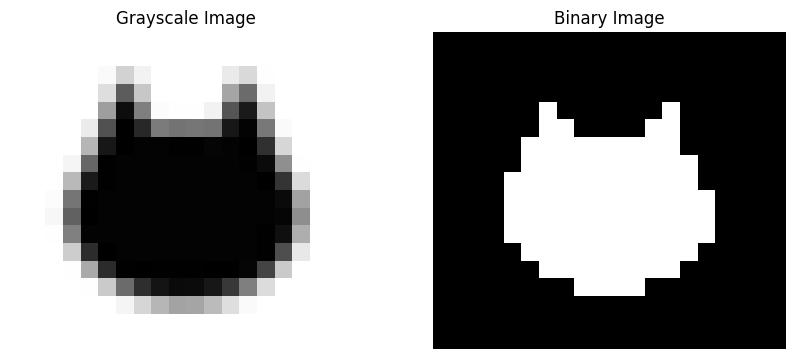

Maximum flow (segmentation result): 2.0


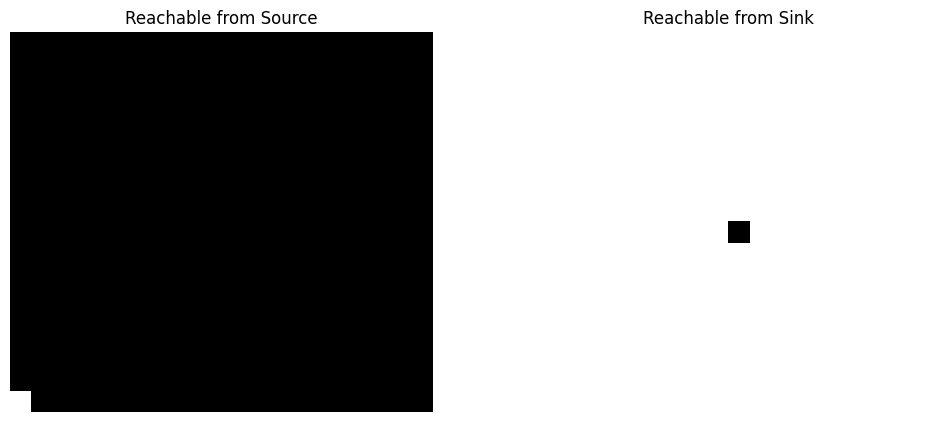

In [2]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from collections import deque, defaultdict

# Step 1: Loading and processing image
img_path = 'problem1_cat.png'  # Path to your image
img = Image.open(img_path)
img = ImageOps.grayscale(img)  # Convert to grayscale
img.show()  # View the grayscale image

# Convert grayscale image to binary
img = np.array(img).astype(np.float32)  # Convert to ndarray
binary_img = (img < 128).astype(int)  # Binarize the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.show()

# Step 2: Define pixel index function
def pixel_index(x, y, width):
    return x * width + y

# Step 3: Convert image to sparse graph
def image_to_graph(image):
    height, width = image.shape
    graph = defaultdict(dict)
    
    for i in range(height):
        for j in range(width):
            index = pixel_index(i, j, width)
            
            if j < width - 1:  # Right neighbor
                right_index = pixel_index(i, j + 1, width)
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))
                graph[index][right_index] = weight
                graph[right_index][index] = weight
            
            if i < height - 1:  # Down neighbor
                down_index = pixel_index(i + 1, j, width)
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))
                graph[index][down_index] = weight
                graph[down_index][index] = weight
    
    return graph, height, width

# Step 4: Implement BFS
def bfs(graph, source, sink, parent):
    visited = set()
    queue = deque([source])
    visited.add(source)
    
    while queue:
        u = queue.popleft()
        for v, capacity in graph[u].items():
            if v not in visited and capacity > 0:
                queue.append(v)
                visited.add(v)
                parent[v] = u
                if v == sink:
                    return True
    
    return False

# Step 5: Implement Ford-Fulkerson algorithm
def ford_fulkerson(graph, source, sink):
    parent = {}
    max_flow = 0
    residual_graph = {u: edges.copy() for u, edges in graph.items()}
    
    while bfs(residual_graph, source, sink, parent):
        path_flow = float('Inf')
        s = sink
        
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s])
            s = parent[s]
        
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= path_flow
            residual_graph[v][u] += path_flow
            v = parent[v]
        
        max_flow += path_flow
    
    return max_flow, residual_graph

# Step 6: Define source and sink
def define_source_sink(image):
    height, width = image.shape
    source = pixel_index(height - 1, 0, width)  # Bottom-left corner
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel
    return source, sink

# Step 7: Find reachable nodes
def find_reachable(graph, source):
    visited = set()
    queue = deque([source])
    visited.add(source)
    
    while queue:
        u = queue.popleft()
        for v, capacity in graph[u].items():
            if v not in visited and capacity > 0:
                queue.append(v)
                visited.add(v)
    
    return visited

# Main execution
if __name__ == "__main__":
    graph, height, width = image_to_graph(binary_img)  # Convert the image to a sparse graph
    source, sink = define_source_sink(binary_img)  # Define source and sink
    max_flow, residual_graph = ford_fulkerson(graph, source, sink)  # Run Ford-Fulkerson

    print(f"Maximum flow (segmentation result): {max_flow}")

    # Find reachable nodes
    reachable_from_source = find_reachable(residual_graph, source)
    reachable_from_sink = find_reachable(residual_graph, sink)
    
    # Generate segmented images
    segmented_source = np.zeros_like(binary_img)
    segmented_sink = np.ones_like(binary_img)
    
    for pixel in reachable_from_source:
        x, y = divmod(pixel, width)
        segmented_source[x, y] = 1  # Foreground (black)
    
    for pixel in reachable_from_sink:
        x, y = divmod(pixel, width)
        segmented_sink[x, y] = 1  # Background (white)
    
    segmented_source[height - 1, 0] = 1  # Ensure source is marked
    segmented_sink[height // 2, width // 2] = 0  # Ensure sink is marked
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Reachable from Source')
    plt.imshow(segmented_source, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Reachable from Sink')
    plt.imshow(segmented_sink, cmap='gray')
    plt.axis('off')
    
    plt.show()


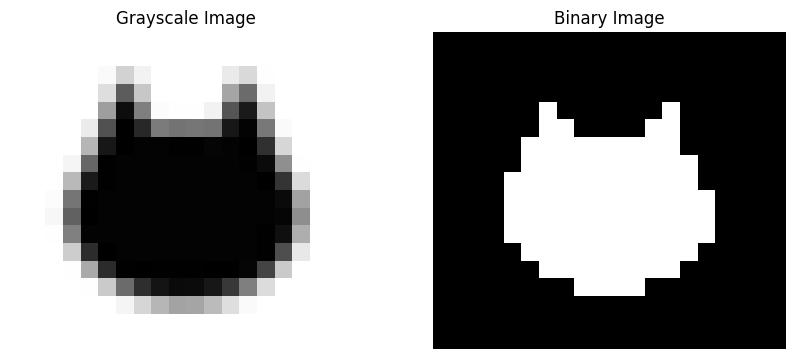

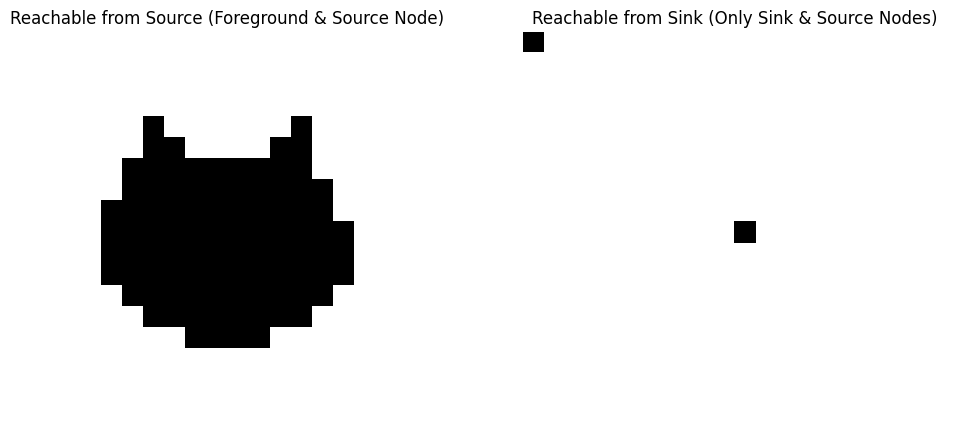

In [7]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Load and process image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image (0 = foreground, 1 = background)  

plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y, width):  
    return x * width + y  

# Step 3: Convert image to graph (adjacency matrix with weights)  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j, width)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# # Step 4: Implement Restricted BFS for Source  
# def bfs_source_restricted(capacity, source, valid_nodes):  
#     visited = np.zeros(len(capacity), dtype=int)  # Array to track visited nodes  
#     queue = deque([source])  
#     visited[source] = 1  # Mark source node  

#     while queue:  
#         u = queue.popleft()  

#         for v in range(len(capacity)):  
#             if (
#                 not visited[v] and  # Not visited yet  
#                 capacity[u][v] > 0 and  # Has valid connection  
#                 v in valid_nodes  # Must be part of foreground (black)
#             ):  
#                 queue.append(v)  
#                 visited[v] = 1  # Mark as reachable  

#     visited[source] = 1  # Ensure source node is black  
#     return visited  # Returns array where 1 means reachable, 0 means not reachable  


# Step 4: Implement Restricted BFS for Source  
def bfs_source_restricted(capacity, source, valid_nodes):  
    visited = np.zeros(len(capacity), dtype=int)  # Array to track visited nodes  
    queue = deque([source])  
    visited[source] = 1  # Mark source node as visited  

    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if (
                not visited[v] and  # Not visited yet  
                capacity[u][v] > 0 and  # Has valid connection  
                v in valid_nodes  # Must be part of foreground (black)
            ):  
                queue.append(v)  
                visited[v] = 1  # Mark as reachable  

    visited[source] = 1  # 🔹 Ensure source node is black  
    return visited  # Returns array where 1 means reachable, 0 means not reachable  


# Step 5: Implement Sink (Sink Node & Source Node Only)  
def bfs_sink_only(sink, source, total_nodes):  
    visited = np.ones(total_nodes, dtype=int)  # Start with all white (1s)  
    visited[sink] = 0  # Mark sink node as black  
    visited[source] = 0  # Mark source node as black  
    return visited  

# Step 6: Define Source and Sink Nodes  
def define_source_sink(image):  
    height, width = image.shape  
    source = pixel_index(0, 0, width)  # Top-left corner as source  
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel as sink  
    return source, sink  

# Main Execution  
if __name__ == "__main__":  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sink = define_source_sink(binary_img)  # Define single source and sink  

    # Get valid foreground (black) nodes  
    foreground_nodes = set(np.where(binary_img.flatten() == 0)[0])  

    # Compute Reachability  
    reachable_from_source = bfs_source_restricted(capacity, source, foreground_nodes)  
    reachable_from_sink = bfs_sink_only(sink, source, len(capacity))  

    # Reshape to image dimensions  
    final_reachable_source = reachable_from_source.reshape(binary_img.shape)  
    final_reachable_sink = reachable_from_sink.reshape(binary_img.shape)  

    # Display Reachable Nodes  
    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Reachable from Source (Foreground & Source Node)')  
    plt.imshow(final_reachable_source, cmap='gray')  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Reachable from Sink (Only Sink & Source Nodes)')  
    plt.imshow(final_reachable_sink, cmap='gray')  
    plt.axis('off')  

    plt.show()


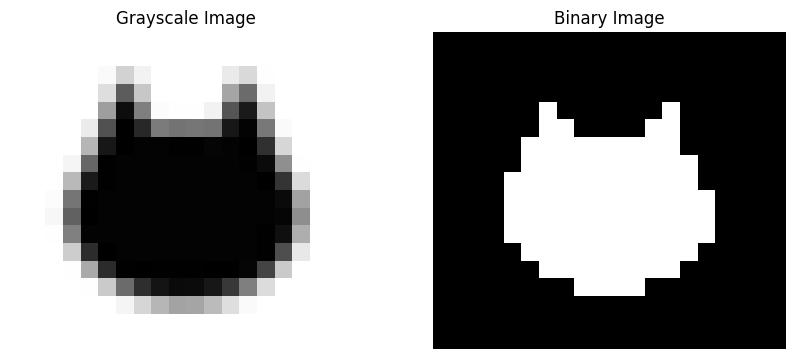

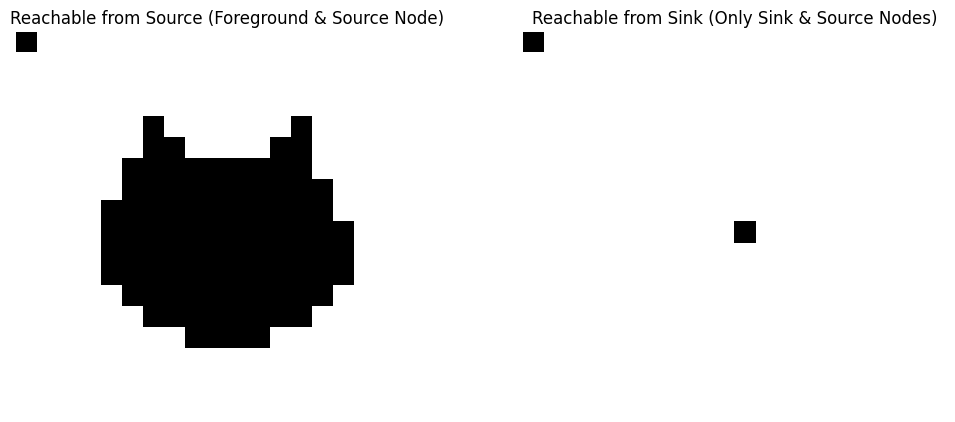

In [11]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Load and process image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image (0 = foreground, 1 = background)  

plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y, width):  
    return x * width + y  

# Step 3: Convert image to graph (adjacency matrix with weights)  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j, width)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement Restricted BFS for Source  
def bfs_source_restricted(capacity, source, valid_nodes):  
    visited = np.zeros(len(capacity), dtype=int)  # Array to track visited nodes  
    queue = deque([source])  
    visited[source] = 1  # Mark source node as visited  

    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if (  
                not visited[v] and  # Not visited yet  
                capacity[u][v] > 0 and  # Has valid connection  
                v in valid_nodes  # Must be part of foreground (black)
            ):  
                queue.append(v)  
                visited[v] = 1  # Mark as reachable  

    visited[source] = 1  # Ensure source node is black  
    return visited  # Returns array where 1 means reachable, 0 means not reachable  

# Step 5: Implement Sink (Sink Node & Source Node Only)  
def bfs_sink_only(sink, source, total_nodes):  
    visited = np.ones(total_nodes, dtype=int)  # Start with all white (1s)  
    visited[sink] = 0  # Mark sink node as black  
    visited[source] = 0  # Mark source node as black  
    return visited  

# Step 6: Define Source and Sink Nodes  
def define_source_sink(image):  
    height, width = image.shape  
    source = pixel_index(0, 0, width)  # Top-left corner as source  
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel as sink  
    return source, sink  

# Main Execution  
if __name__ == "__main__":  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sink = define_source_sink(binary_img)  # Define single source and sink  

    # Get valid foreground (black) nodes  
    foreground_nodes = set(np.where(binary_img.flatten() == 0)[0])  

    # Compute Reachability  
    reachable_from_source = bfs_source_restricted(capacity, source, foreground_nodes)  
    reachable_from_sink = bfs_sink_only(sink, source, len(capacity))  

    # Reshape to image dimensions  
    final_reachable_source = reachable_from_source.reshape(binary_img.shape)  
    final_reachable_sink = reachable_from_sink.reshape(binary_img.shape)  

    # Ensure the source node (top-left) is black in the image
    final_reachable_source[0, 0] = 0

    # Display Reachable Nodes  
    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Reachable from Source (Foreground & Source Node)')  
    plt.imshow(final_reachable_source, cmap='gray')  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Reachable from Sink (Only Sink & Source Nodes)')  
    plt.imshow(final_reachable_sink, cmap='gray')  
    plt.axis('off')  

    plt.show()


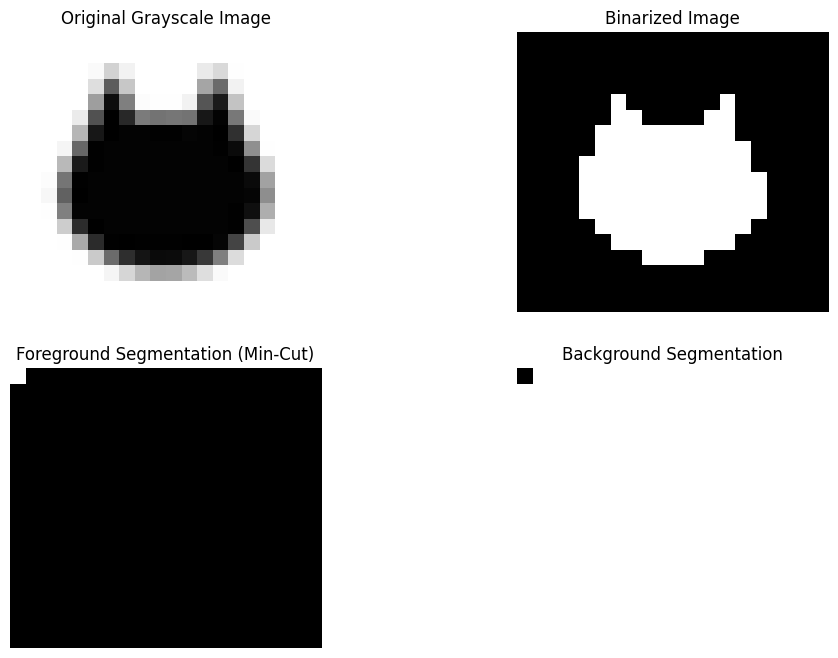

In [3]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Load and process image
img_path = 'problem1_cat.png'  # Image file path
img = Image.open(img_path)
img = ImageOps.grayscale(img)
img = np.array(img).astype(np.float32)
binary_img = (img < 128).astype(int)  # Binarize image

# Function to get pixel index
def pixel(x, y, w):
    return x * w + y

# Convert image to graph with capacities
def image_to_graph(image):
    height, width = image.shape
    num_pixels = height * width
    capacity = np.zeros((num_pixels, num_pixels))
    
    for i in range(height):
        for j in range(width):
            index = pixel(i, j, width)
            if j < width - 1:
                right_index = pixel(i, j + 1, width)
                weight = 1 / (1 + abs(img[i, j] - img[i, j + 1]))
                capacity[index][right_index] = weight
                capacity[right_index][index] = weight
            if i < height - 1:
                down_index = pixel(i + 1, j, width)
                weight = 1 / (1 + abs(img[i, j] - img[i + 1, j]))
                capacity[index][down_index] = weight
                capacity[down_index][index] = weight
    
    return capacity

# BFS for Ford-Fulkerson
def bfs(capacity, source, sink, parent):
    visited = np.zeros(len(capacity), dtype=bool)
    queue = deque([source])
    visited[source] = True
    
    while queue:
        u = queue.popleft()
        for v in range(len(capacity)):
            if not visited[v] and capacity[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
                if v == sink:
                    return True
    return False

# Ford-Fulkerson Algorithm
def ford_fulkerson(capacity, source, sink):
    residual = capacity.copy()
    parent = np.full(len(capacity), -1)
    max_flow = 0
    
    while bfs(residual, source, sink, parent):
        path_flow = float('Inf')
        v = sink
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, residual[u][v])
            v = parent[v]
        v = sink
        while v != source:
            u = parent[v]
            residual[u][v] -= path_flow
            residual[v][u] += path_flow
            v = parent[v]
        max_flow += path_flow
    
    return max_flow, residual

# Find Min-Cut using BFS
def find_min_cut(residual, source):
    visited = np.zeros(len(residual), dtype=bool)
    queue = deque([source])
    visited[source] = True
    
    while queue:
        u = queue.popleft()
        for v in range(len(residual)):
            if residual[u][v] > 0 and not visited[v]:
                queue.append(v)
                visited[v] = True
    return visited

# Find source and sink in the image
def bfs_source_sink(image):
    height, width = image.shape
    source = pixel(0, 0, width)
    sink = pixel(height - 1, width - 1, width)
    return source, sink

# Execute segmentation
capacity = image_to_graph(binary_img)
source, sink = bfs_source_sink(binary_img)
max_flow, residual = ford_fulkerson(capacity, source, sink)
reachable_from_source = find_min_cut(residual, source)

# Reshape segmentation result
foreground_mask = reachable_from_source.reshape(binary_img.shape)
background_mask = ~foreground_mask

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Binarized Image')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Foreground Segmentation (Min-Cut)')
plt.imshow(foreground_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Background Segmentation')
plt.imshow(background_mask, cmap='gray')
plt.axis('off')

plt.show()

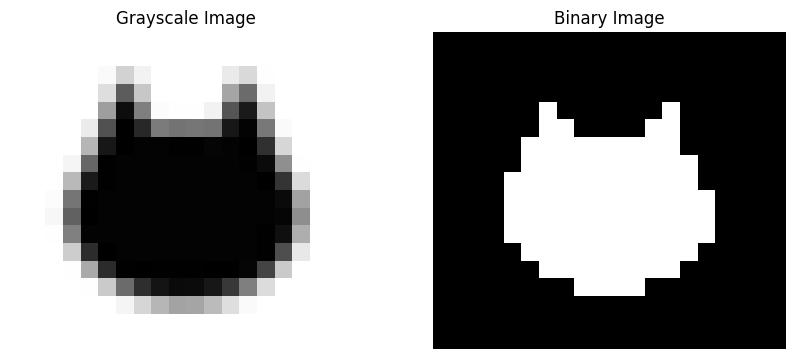

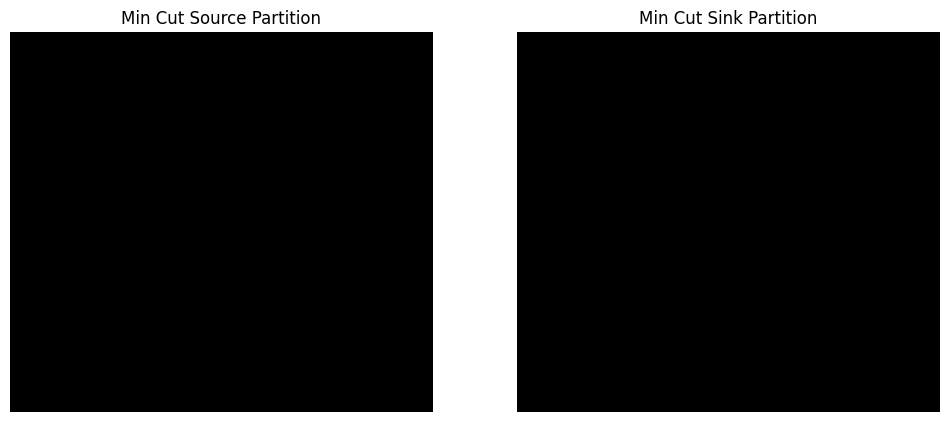

In [4]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Step 1: Load and process the image
img_path = 'problem1_cat.png'  # Update with your image path
img = Image.open(img_path)
img = ImageOps.grayscale(img)  # Convert to grayscale
img_array = np.array(img).astype(np.float32)
binary_img = (img_array < 128).astype(int)  # 0 for foreground (black), 1 for background (white)

# Display the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Grayscale Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.show()

# Step 2: Define pixel index conversion
def pixel_index(x, y, width):
    return x * width + y

# Step 3: Convert image to graph (adjacency matrix with capacities)
def image_to_graph(image):
    height, width = image.shape
    num_pixels = height * width
    capacity = np.zeros((num_pixels, num_pixels), dtype=np.float32)

    for i in range(height):
        for j in range(width):
            current = pixel_index(i, j, width)
            # Right neighbor
            if j < width - 1:
                right = pixel_index(i, j + 1, width)
                weight = 1.0 / (1.0 + abs(image[i, j] - image[i, j + 1]))
                capacity[current, right] = weight
                capacity[right, current] = weight
            # Down neighbor
            if i < height - 1:
                down = pixel_index(i + 1, j, width)
                weight = 1.0 / (1.0 + abs(image[i, j] - image[i + 1, j]))
                capacity[current, down] = weight
                capacity[down, current] = weight
    return capacity

# Step 4: Implement Edmonds-Karp algorithm for max flow
def edmonds_karp(capacity, source, sink):
    n = capacity.shape[0]
    residual = np.copy(capacity)
    parent = np.zeros(n, dtype=int)
    max_flow = 0

    def bfs():
        visited = np.zeros(n, dtype=bool)
        queue = deque([source])
        visited[source] = True
        parent[:] = -1  # Reset parent array

        while queue:
            u = queue.popleft()
            for v in range(n):
                if not visited[v] and residual[u, v] > 0:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)
                    if v == sink:
                        return True
        return False

    while bfs():
        path_flow = float('inf')
        v = sink
        # Find minimum residual capacity of the path
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, residual[u, v])
            v = u
        # Update residual capacities
        v = sink
        while v != source:
            u = parent[v]
            residual[u, v] -= path_flow
            residual[v, u] += path_flow
            v = u
        max_flow += path_flow

    return max_flow, residual

# Step 5: Find nodes in the source partition of the min cut
def find_min_cut(residual_graph, source):
    n = residual_graph.shape[0]
    visited = np.zeros(n, dtype=bool)
    queue = deque([source])
    visited[source] = True

    while queue:
        u = queue.popleft()
        for v in range(n):
            if residual_graph[u, v] > 0 and not visited[v]:
                visited[v] = True
                queue.append(v)
    return visited

# Step 6: Define source and sink nodes
def define_source_sink(image):
    height, width = image.shape
    source = pixel_index(0, 0, width)  # Top-left corner
    sink = pixel_index(height // 2, width // 2, width)  # Center
    return source, sink

# Main execution
if __name__ == "__main__":
    # Convert image to graph and define source/sink
    capacity = image_to_graph(binary_img)
    source, sink = define_source_sink(binary_img)

    # Compute max flow and residual graph
    max_flow, residual = edmonds_karp(capacity, source, sink)

    # Determine min cut partitions
    source_set = find_min_cut(residual, source)

    # Reshape to image dimensions
    final_source = source_set.reshape(binary_img.shape)
    final_source[0, 0] = 0  # Set source pixel to black for visualization
    final_sink = ~source_set.reshape(binary_img.shape)  # Complement for sink set

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Min Cut Source Partition')
    plt.imshow(final_source, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Min Cut Sink Partition')
    plt.imshow(final_sink, cmap='gray')
    plt.axis('off')

    plt.show()

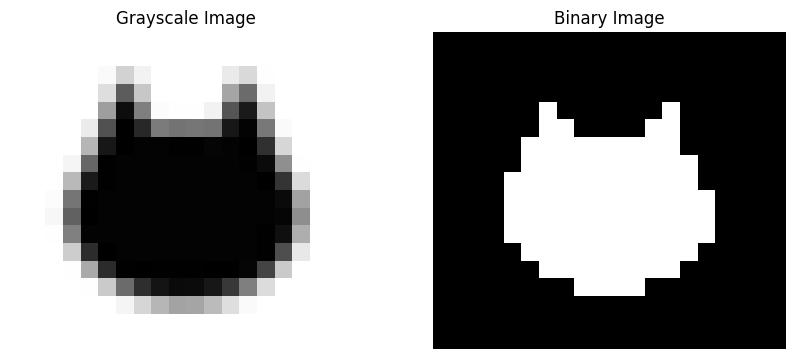

Maximum flow (segmentation result): 2.0


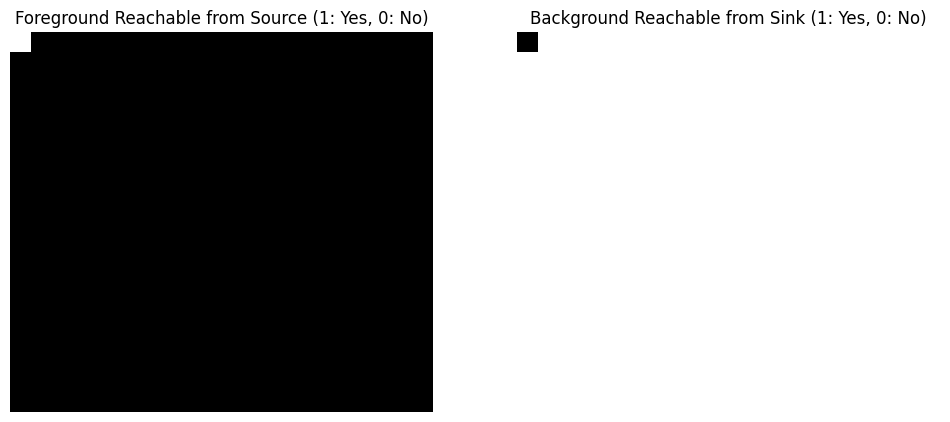

In [20]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Loading and processing image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the grayscale image  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image  
plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  
plt.title('Grayscale Image')  
plt.imshow(img, cmap='gray')  
plt.axis('off')  

plt.subplot(1, 2, 2)  
plt.title('Binary Image')  
plt.imshow(binary_img, cmap='gray')  
plt.axis('off')  
plt.show()  

# Step 2: Define pixel index function  
def pixel_index(x, y):  
    return x * w + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement BFS  
def bfs(capacity, source, sink, parent):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if not visited[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited[v] = True  
                parent[v] = u  
                
                if v == sink:  
                    return True  
    
    return False  

# Step 5: Implement Ford-Fulkerson algorithm  
def ford_fulkerson(capacity, source, sink):  
    parent = [-1] * len(capacity)  
    max_flow = 0  

    while bfs(capacity, source, sink, parent):  
        # Find the maximum flow through the path found by BFS  
        path_flow = float('Inf')  
        s = sink  

        while s != source:  
            path_flow = min(path_flow, capacity[parent[s]][s])  
            s = parent[s]  

        # update capacities of the edges and reverse edges along the path  
        v = sink  
        while v != source:  
            u = parent[v]  
            capacity[u][v] -= path_flow  
            capacity[v][u] += path_flow  
            v = parent[v]  

        max_flow += path_flow  

    return max_flow  

# Step 6: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = 0  # Top-left corner  
    sink = pixel_index(height // 2, width // 2)  # Center pixel  
    return source, sink  

# Step 7: Find reachable nodes from source and sink  
def find_reachable(capacity, source, sink):  
    visited_from_source = [False] * len(capacity)  
    visited_from_sink = [False] * len(capacity)  

    # BFS from source  
    queue = deque([source])  
    visited_from_source[source] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_source[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited_from_source[v] = True  

    # BFS from sink  
    queue = deque([sink])  
    visited_from_sink[sink] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_sink[v] and capacity[v][u] > 0:  # Use residual capacities  
                queue.append(v)  
                visited_from_sink[v] = True  

    return visited_from_source, visited_from_sink  

# Main execution  
if __name__ == "__main__":  
    binary_img = (img < 128).astype(int)  # Binarize the image again if needed  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sink = define_source_sink(binary_img)  # Define source and sink  
    max_flow = ford_fulkerson(capacity, source, sink)  # Run Ford-Fulkerson  

    print(f"Maximum flow (segmentation result): {max_flow}")  

    # Step 8: Find reachable nodes  
    reachable_from_source, reachable_from_sink = find_reachable(capacity, source, sink)  

    # Visualization of reachable nodes, output as requested  
    source_reachable_image = np.array(reachable_from_source).reshape(binary_img.shape)  
    sink_reachable_image = np.array(reachable_from_sink).reshape(binary_img.shape)  

    plt.figure(figsize=(12, 6))  

    plt.subplot(1, 2, 1)  
    plt.title('Foreground Reachable from Source (1: Yes, 0: No)')  
    plt.imshow(source_reachable_image, cmap='gray', vmin=0, vmax=1)  # Show reachable nodes from source  
    plt.axis('off')  
    
    plt.subplot(1, 2, 2)  
    plt.title('Background Reachable from Sink (1: Yes, 0: No)')  
    plt.imshow(sink_reachable_image, cmap='gray', vmin=0, vmax=1)  # Show reachable nodes from sink  
    plt.axis('off')  

    plt.show()

Maximum flow (segmentation result): 2.0


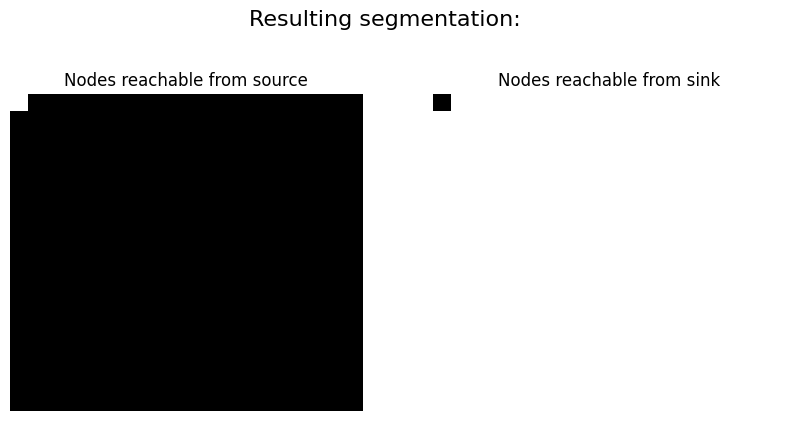

In [21]:
from PIL import Image, ImageOps  
import numpy as np  
import matplotlib.pyplot as plt  
from collections import deque  

# Step 1: Loading and processing image  
img_path = 'problem1_cat.png'  # Path to your image  
img = Image.open(img_path)  
img = ImageOps.grayscale(img)  # Convert to grayscale  
img.show()  # View the grayscale image  

# Convert grayscale image to binary  
img = np.array(img).astype(np.float32)  # Convert to ndarray  
binary_img = (img < 128).astype(int)  # Binarize the image  

# Step 2: Define pixel index function  
def pixel_index(x, y, width):  
    return x * width + y  

# Step 3: Convert image to graph  
def image_to_graph(image):  
    height, width = image.shape  
    num_pixels = height * width  
    capacity = np.zeros((num_pixels, num_pixels))  

    for i in range(height):  
        for j in range(width):  
            index = pixel_index(i, j, width)  
            
            # Check neighbors (right, down)  
            if j < width - 1:  # Right neighbor  
                right_index = pixel_index(i, j + 1, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity  
                capacity[index][right_index] = weight  
                capacity[right_index][index] = weight  # Undirected edge  

            if i < height - 1:  # Down neighbor  
                down_index = pixel_index(i + 1, j, width)  
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity  
                capacity[index][down_index] = weight  
                capacity[down_index][index] = weight  # Undirected edge  
                
    return capacity  

# Step 4: Implement BFS  
def bfs(capacity, source, sink, parent):  
    visited = [False] * len(capacity)  
    queue = deque([source])  
    visited[source] = True  
    
    while queue:  
        u = queue.popleft()  

        for v in range(len(capacity)):  
            if not visited[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited[v] = True  
                parent[v] = u  
                
                if v == sink:  
                    return True  
    
    return False  

# Step 5: Implement Ford-Fulkerson algorithm  
def ford_fulkerson(capacity, source, sink):  
    parent = [-1] * len(capacity)  
    max_flow = 0  

    while bfs(capacity, source, sink, parent):  
        # Find the maximum flow through the path found by BFS  
        path_flow = float('Inf')  
        s = sink  

        while s != source:  
            path_flow = min(path_flow, capacity[parent[s]][s])  
            s = parent[s]  

        # Update capacities of the edges and reverse edges along the path  
        v = sink  
        while v != source:  
            u = parent[v]  
            capacity[u][v] -= path_flow  
            capacity[v][u] += path_flow  
            v = parent[v]  

        max_flow += path_flow  

    return max_flow  

# Step 6: Define source and sink  
def define_source_sink(image):  
    height, width = image.shape  
    source = 0  # Top-left corner  
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel  
    return source, sink  

# Step 7: Find reachable nodes from source and sink  
def find_reachable(capacity, source, sink):  
    visited_from_source = [False] * len(capacity)  
    visited_from_sink = [False] * len(capacity)  

    # BFS from source  
    queue = deque([source])  
    visited_from_source[source] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_source[v] and capacity[u][v] > 0:  
                queue.append(v)  
                visited_from_source[v] = True  

    # BFS from sink  
    queue = deque([sink])  
    visited_from_sink[sink] = True  
    while queue:  
        u = queue.popleft()  
        for v in range(len(capacity)):  
            if not visited_from_sink[v] and capacity[v][u] > 0:  # Use residual capacities  
                queue.append(v)  
                visited_from_sink[v] = True  

    return visited_from_source, visited_from_sink  

# Main execution  
if __name__ == "__main__":  
    binary_img = (img < 128).astype(int)  # Binarize the image again if needed  
    capacity = image_to_graph(binary_img)  # Convert the image to a graph  
    source, sink = define_source_sink(binary_img)  # Define source and sink  
    max_flow = ford_fulkerson(capacity, source, sink)  # Run Ford-Fulkerson  

    print(f"Maximum flow (segmentation result): {max_flow}")  

    # Find reachable nodes  
    reachable_from_source, reachable_from_sink = find_reachable(capacity, source, sink)  

    # Visualization of reachable nodes  
    source_reachable_image = np.array(reachable_from_source).reshape(binary_img.shape)  
    sink_reachable_image = np.array(reachable_from_sink).reshape(binary_img.shape)  

    # Create the figure for displaying results  
    plt.figure(figsize=(10, 5))  
    plt.suptitle("Resulting segmentation:", fontsize=16)  

    plt.subplot(1, 2, 1)  
    plt.title('Nodes reachable from source')  
    plt.imshow(source_reachable_image, cmap='gray', vmin=0, vmax=1)  # Show foreground  
    plt.axis('off')  

    plt.subplot(1, 2, 2)  
    plt.title('Nodes reachable from sink')  
    plt.imshow(sink_reachable_image, cmap='gray', vmin=0, vmax=1)  # Show background  
    plt.axis('off')  

    plt.show()

Maximum flow (segmentation result): 2.0


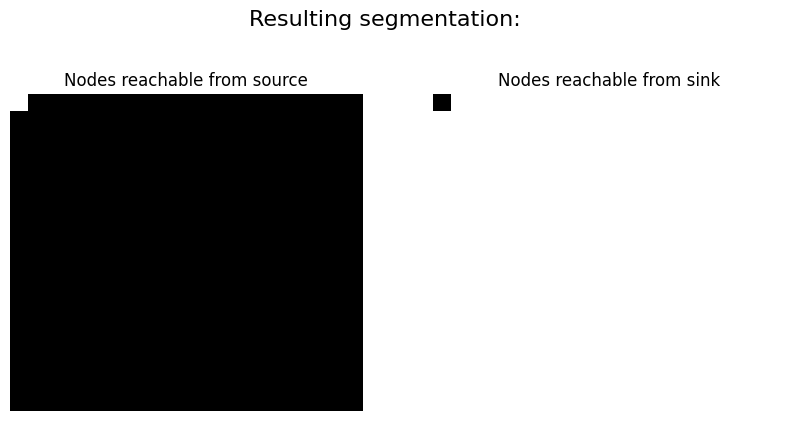

In [24]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Step 1: Load and process the uploaded image
img_path = 'problem1_cat.png'  # Corrected image path
img = Image.open(img_path)
img = ImageOps.grayscale(img)  # Convert to grayscale

# Convert grayscale image to binary using Otsu's thresholding
img = np.array(img).astype(np.float32)  # Convert to ndarray
threshold = np.mean(img)  # Simple threshold (could use Otsu's method for better results)
binary_img = (img < threshold).astype(int)  # Binarize the image

# Step 2: Define pixel index function
def pixel_index(x, y, width):
    return x * width + y

# Step 3: Convert image to graph
def image_to_graph(image):
    height, width = image.shape
    num_pixels = height * width
    capacity = np.zeros((num_pixels, num_pixels))

    for i in range(height):
        for j in range(width):
            index = pixel_index(i, j, width)
            
            # Check neighbors (right, down)
            if j < width - 1:  # Right neighbor
                right_index = pixel_index(i, j + 1, width)
                weight = 1 / (1 + abs(image[i, j] - image[i, j + 1]))  # Similarity
                capacity[index][right_index] = weight
                capacity[right_index][index] = weight  # Undirected edge

            if i < height - 1:  # Down neighbor
                down_index = pixel_index(i + 1, j, width)
                weight = 1 / (1 + abs(image[i, j] - image[i + 1, j]))  # Similarity
                capacity[index][down_index] = weight
                capacity[down_index][index] = weight  # Undirected edge
                
    return capacity

# Step 4: Implement BFS
def bfs(capacity, source, sink, parent):
    visited = [False] * len(capacity)
    queue = deque([source])
    visited[source] = True
    
    while queue:
        u = queue.popleft()
        for v in range(len(capacity)):
            if not visited[v] and capacity[u][v] > 0:
                queue.append(v)
                visited[v] = True
                parent[v] = u
                if v == sink:
                    return True
    return False

# Step 5: Implement Ford-Fulkerson algorithm
def ford_fulkerson(capacity, source, sink):
    parent = [-1] * len(capacity)
    max_flow = 0

    while bfs(capacity, source, sink, parent):
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, capacity[parent[s]][s])
            s = parent[s]

        v = sink
        while v != source:
            u = parent[v]
            capacity[u][v] -= path_flow
            capacity[v][u] += path_flow
            v = parent[v]

        max_flow += path_flow
    
    return max_flow

# Step 6: Define source and sink
def define_source_sink(image):
    height, width = image.shape
    source = 0  # Top-left corner
    sink = pixel_index(height // 2, width // 2, width)  # Center pixel
    return source, sink

# Step 7: Find reachable nodes from source and sink
def find_reachable(capacity, source, sink):
    visited_from_source = [False] * len(capacity)
    visited_from_sink = [False] * len(capacity)

    # BFS from source
    queue = deque([source])
    visited_from_source[source] = True
    while queue:
        u = queue.popleft()
        for v in range(len(capacity)):
            if not visited_from_source[v] and capacity[u][v] > 0:
                queue.append(v)
                visited_from_source[v] = True

    # BFS from sink
    queue = deque([sink])
    visited_from_sink[sink] = True
    while queue:
        u = queue.popleft()
        for v in range(len(capacity)):
            if not visited_from_sink[v] and capacity[v][u] > 0:
                queue.append(v)
                visited_from_sink[v] = True

    return visited_from_source, visited_from_sink

# Main execution
if __name__ == "__main__":
    binary_img = (img < threshold).astype(int)  # Binarize the image
    capacity = image_to_graph(binary_img)  # Convert image to a graph
    source, sink = define_source_sink(binary_img)  # Define source and sink
    max_flow = ford_fulkerson(capacity, source, sink)  # Run Ford-Fulkerson

    print(f"Maximum flow (segmentation result): {max_flow}")

    # Find reachable nodes
    reachable_from_source, reachable_from_sink = find_reachable(capacity, source, sink)

    # Visualization
    source_reachable_image = np.array(reachable_from_source).reshape(binary_img.shape)
    sink_reachable_image = np.array(reachable_from_sink).reshape(binary_img.shape)

    plt.figure(figsize=(10, 5))
    plt.suptitle("Resulting segmentation:", fontsize=16)

    plt.subplot(1, 2, 1)
    plt.title('Nodes reachable from source')
    plt.imshow(source_reachable_image, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Nodes reachable from sink')
    plt.imshow(sink_reachable_image, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')

    plt.show()


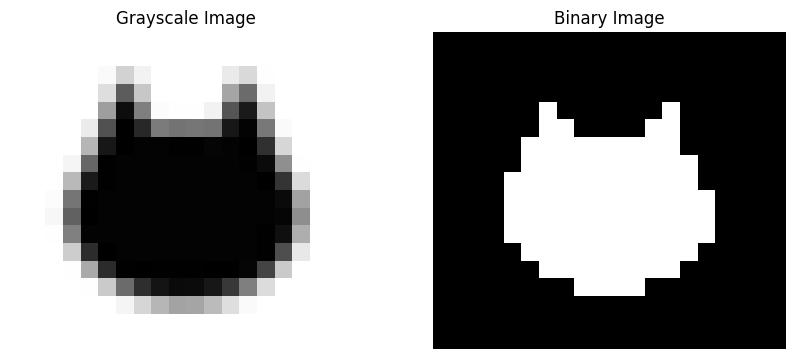

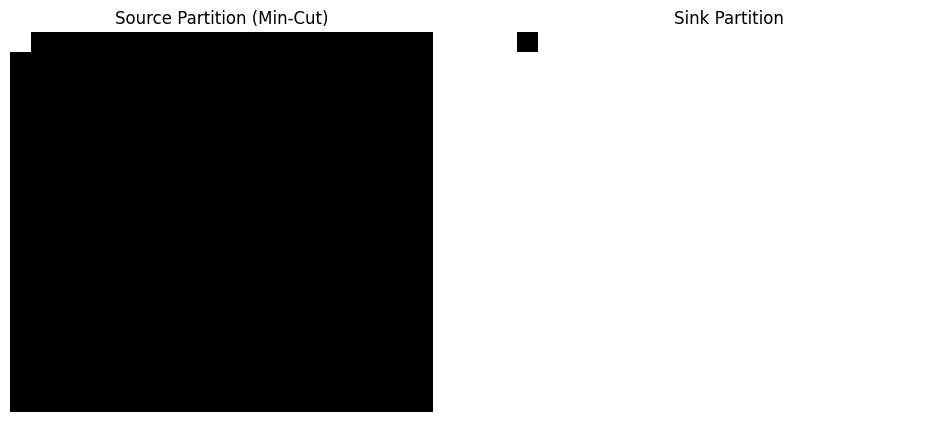

In [5]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Load and preprocess the image
img_path = 'problem1_cat.png'
img = Image.open(img_path)
img = ImageOps.grayscale(img)
img_array = np.array(img).astype(np.float32)
binary_img = (img_array < 128).astype(int)  # 0 for foreground, 1 for background

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

# Convert pixel coordinates to a unique index
def pixel_index(x, y, width):
    return x * width + y

# Build the graph with capacities based on pixel similarity
def image_to_graph(image):
    height, width = image.shape
    num_pixels = height * width
    capacity = np.zeros((num_pixels + 2, num_pixels + 2), dtype=np.float32)  # +2 for source/sink
    
    # Source and sink indices (placed at the end of the capacity matrix)
    source = num_pixels
    sink = num_pixels + 1
    
    # Connect source to top-left pixel and sink to center pixel with high capacity
    top_left = pixel_index(0, 0, width)
    capacity[source, top_left] = float('inf')
    
    # Connect sink to center pixel
    center_y = width // 2
    center_x = height // 2
    center_pixel = pixel_index(center_x, center_y, width)
    capacity[center_pixel, sink] = float('inf')
    
    # Add edges between neighboring pixels
    for i in range(height):
        for j in range(width):
            current = pixel_index(i, j, width)
            # Right neighbor
            if j < width - 1:
                right = pixel_index(i, j + 1, width)
                weight = 1.0 / (1.0 + abs(image[i, j] - image[i, j + 1]))
                capacity[current, right] = weight
                capacity[right, current] = weight
            # Down neighbor
            if i < height - 1:
                down = pixel_index(i + 1, j, width)
                weight = 1.0 / (1.0 + abs(image[i, j] - image[i + 1, j]))
                capacity[current, down] = weight
                capacity[down, current] = weight
    return capacity, source, sink

# Edmonds-Karp algorithm for max flow
def edmonds_karp(capacity, source, sink):
    residual = np.copy(capacity)
    parent = np.zeros(residual.shape[0], dtype=int)
    max_flow = 0

    def bfs():
        visited = np.zeros_like(parent, dtype=bool)
        queue = deque([source])
        visited[source] = True
        parent[:] = -1

        while queue:
            u = queue.popleft()
            for v in range(residual.shape[0]):
                if not visited[v] and residual[u, v] > 0:
                    visited[v] = True
                    parent[v] = u
                    queue.append(v)
                    if v == sink:
                        return True
        return False

    while bfs():
        path_flow = float('inf')
        v = sink
        while v != source:
            u = parent[v]
            path_flow = min(path_flow, residual[u, v])
            v = u
        v = sink
        while v != source:
            u = parent[v]
            residual[u, v] -= path_flow
            residual[v, u] += path_flow
            v = u
        max_flow += path_flow
    return max_flow, residual

# Find nodes in the source partition of the min cut
def find_min_cut(residual_graph, source):
    visited = np.zeros(residual_graph.shape[0], dtype=bool)
    queue = deque([source])
    visited[source] = True

    while queue:
        u = queue.popleft()
        for v in range(residual_graph.shape[0]):
            if residual_graph[u, v] > 0 and not visited[v]:
                visited[v] = True
                queue.append(v)
    return visited

# Main execution
capacity_matrix, source_node, sink_node = image_to_graph(binary_img)
max_flow_value, residual_graph = edmonds_karp(capacity_matrix, source_node, sink_node)

# Extract min-cut partitions
min_cut_nodes = find_min_cut(residual_graph, source_node)

# Exclude the artificial source/sink nodes
height, width = binary_img.shape
pixel_count = height * width
pixel_partition = min_cut_nodes[:pixel_count].reshape(binary_img.shape)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Source Partition (Min-Cut)')
plt.imshow(pixel_partition, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sink Partition')
plt.imshow(~pixel_partition, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
import numpy as np
import cv2
from collections import deque
from PIL import Image, ImageOps

# Load and process image
img_path = "problem1_cat.png"  # Ensure cat.png is in the same directory
img = Image.open(img_path)
img = ImageOps.grayscale(img)
img.show()
img = np.array(img).astype(np.float32)
img = (img < 0.5).astype(int)
print(img.shape)
h, w = img.shape

# Construct graph from image
def build_graph(img):
    rows, cols = img.shape
    graph = {}  # Adjacency list representation
    source, sink = "S", "T"
    
    for i in range(rows):
        for j in range(cols):
            node = (i, j)
            graph[node] = {}
            
            # Assign source/sink connections
            if img[i, j] == 0:
                graph[source] = graph.get(source, {})
                graph[source][node] = 1  # Link dark pixels to source
            else:
                graph[sink] = graph.get(sink, {})
                graph[node] = {sink: 1}  # Link bright pixels to sink
            
            # Connect neighboring pixels
            for di, dj in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < rows and 0 <= nj < cols:
                    graph[node][(ni, nj)] = 1  # Edge weight (similarity measure)
    return graph, source, sink

# BFS for finding an augmenting path
def bfs(graph, source, sink, parent):
    visited = set()
    queue = deque([source])
    visited.add(source)
    
    while queue:
        u = queue.popleft()
        for v in graph.get(u, {}):
            if v not in visited and graph[u][v] > 0:
                queue.append(v)
                visited.add(v)
                parent[v] = u
                if v == sink:
                    return True
    return False

# Ford-Fulkerson Algorithm for Max-Flow
def ford_fulkerson(graph, source, sink):
    residual_graph = {u: v.copy() for u, v in graph.items()}  # Make a copy
    max_flow = 0
    parent = {}
    
    while bfs(residual_graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s])
            s = parent[s]
        
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v] -= path_flow
            residual_graph[v][u] = residual_graph.get(v, {}).get(u, 0) + path_flow
            v = u
        
        max_flow += path_flow
    return max_flow, residual_graph

# Extract min-cut from residual graph
def get_min_cut(graph, residual_graph, source):
    visited = set()
    queue = deque([source])
    while queue:
        u = queue.popleft()
        visited.add(u)
        for v in residual_graph.get(u, {}):
            if residual_graph[u][v] > 0 and v not in visited:
                queue.append(v)
                visited.add(v)
    return visited

# Segment image
def segment_image(img):
    graph, source, sink = build_graph(img)
    _, residual_graph = ford_fulkerson(graph, source, sink)
    reachable = get_min_cut(graph, residual_graph, source)
    
    segmented_img = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            if (i, j) in reachable:
                segmented_img[i, j] = 255  # Assign to one segment
            else:
                segmented_img[i, j] = 0  # Assign to another segment
    
    return segmented_img

# Apply segmentation and visualize
segmented = segment_image(img)
cv2.imshow("Segmented Image", segmented.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


(18, 20)


In [9]:
import numpy as np
from PIL import Image, ImageOps
import networkx as nx
from collections import deque

# Load image
img_path = "problem1_cat.png"  # get this photo from Canvas.
img = Image.open(img_path)  # define img using PIL
img = ImageOps.grayscale(img)  # make the image grayscale
img.show()  # view image
img = np.array(img).astype(np.float32)  # convert img to ndarray
img = (img < 0.5).astype(int)  # binarize the image
print(img.shape)
h, w = img.shape  # get height and width of the img

def build_graph(img):
    G = nx.DiGraph()
    for i in range(h):
        for j in range(w):
            node = i * w + j
            G.add_node(node)
            if j < w - 1:  # Right neighbor
                neighbor = i * w + (j + 1)
                weight = 1 - abs(img[i, j] - img[i, j + 1])
                G.add_edge(node, neighbor, capacity=weight)
                G.add_edge(neighbor, node, capacity=weight)
            if i < h - 1:  # Bottom neighbor
                neighbor = (i + 1) * w + j
                weight = 1 - abs(img[i, j] - img[i + 1, j])
                G.add_edge(node, neighbor, capacity=weight)
                G.add_edge(neighbor, node, capacity=weight)
    return G

def bfs(residual_graph, source, sink, parent):
    visited = set()
    queue = deque([source])
    visited.add(source)
    while queue:
        node = queue.popleft()
        for neighbor in residual_graph[node]:
            if neighbor not in visited and residual_graph[node][neighbor]['capacity'] > 0:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = node
                if neighbor == sink:
                    return True
    return False

def ford_fulkerson(G, source, sink):
    residual_graph = G.copy()
    max_flow = 0
    parent = {}
    while bfs(residual_graph, source, sink, parent):
        path_flow = float('Inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, residual_graph[parent[s]][s]['capacity'])
            s = parent[s]
        v = sink
        while v != source:
            u = parent[v]
            residual_graph[u][v]['capacity'] -= path_flow
            residual_graph[v][u]['capacity'] += path_flow
            v = parent[v]
        max_flow += path_flow
    return max_flow, residual_graph

def segment_image(img, residual_graph, source):
    visited = set()
    queue = deque([source])
    visited.add(source)
    while queue:
        node = queue.popleft()
        for neighbor in residual_graph[node]:
            if neighbor not in visited and residual_graph[node][neighbor]['capacity'] > 0:
                queue.append(neighbor)
                visited.add(neighbor)
    segmented_img = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if i * w + j in visited:
                segmented_img[i, j] = 1  # Foreground
    return segmented_img

# Build graph
G = build_graph(img)
source = 0  # Top-left pixel
sink = h * w // 2  # Center pixel

# Compute max-flow/min-cut
max_flow, residual_graph = ford_fulkerson(G, source, sink)

# Segment the image
segmented_img = segment_image(img, residual_graph, source)
segmented_img = Image.fromarray((segmented_img * 255).astype(np.uint8))
segmented_img.show()


(18, 20)


In [ ]:
import numpy as np
from PIL import Image, ImageOps
from collections import deque

def build_graph(img, high_cap=100, low_cap=1):
    """
    Build a graph from the binarized image.
    Each pixel (i, j) is a node. For every 4-connected neighbor, 
    add a directed edge in both directions. If two neighboring pixels 
    are the same, assign a high capacity; otherwise, assign a low capacity.
    """
    h, w = img.shape
    graph = {}
    for i in range(h):
        for j in range(w):
            node = (i, j)
            graph[node] = {}
            # Check the four neighbors: up, down, left, right.
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < h and 0 <= nj < w:
                    neighbor = (ni, nj)
                    # If pixels are similar, assign high capacity; if not, low capacity.
                    if img[i, j] == img[ni, nj]:
                        cap = high_cap
                    else:
                        cap = low_cap
                    graph[node][neighbor] = cap
    return graph

def dfs(residual, source, sink, parent):
    """
    Depth-first search to find an augmenting path in the residual graph.
    The parent dictionary is updated to reconstruct the path.
    Returns True if a path is found, False otherwise.
    """
    stack = [source]
    visited = {source}
    while stack:
        u = stack.pop()
        if u == sink:
            return True
        for v, capacity in residual[u].items():
            if capacity > 0 and v not in visited:
                visited.add(v)
                parent[v] = u
                stack.append(v)
    return False

def ford_fulkerson(graph, source, sink):
    """
    Implements the Ford–Fulkerson algorithm using DFS to find augmenting paths.
    Returns the maximum flow and the final residual graph.
    """
    # Initialize the residual graph with the same capacities as the original graph.
    residual = {u: {} for u in graph}
    for u in graph:
        for v in graph[u]:
            residual[u][v] = graph[u][v]
    
    # Ensure reverse edges exist (with 0 capacity initially) for all edges.
    for u in list(residual.keys()):
        for v in list(residual[u].keys()):
            if v not in residual:
                residual[v] = {}
            if u not in residual[v]:
                residual[v][u] = 0

    max_flow = 0
    parent = {}
    # While an augmenting path exists, add its flow.
    while True:
        parent = {node: None for node in residual}
        if not dfs(residual, source, sink, parent):
            break
        
        # Find the bottleneck capacity on the path found.
        path_flow = float('inf')
        s = sink
        while s != source:
            path_flow = min(path_flow, residual[parent[s]][s])
            s = parent[s]
        
        # Update the residual capacities along the path.
        v = sink
        while v != source:
            u = parent[v]
            residual[u][v] -= path_flow
            residual[v][u] += path_flow
            v = u
        
        max_flow += path_flow
    return max_flow, residual

def get_reachable_nodes(residual, source):
    """
    After running max-flow, perform DFS in the residual graph starting at the source
    to determine which nodes are still reachable.
    """
    reachable = set()
    stack = [source]
    reachable.add(source)
    while stack:
        u = stack.pop()
        for v, capacity in residual[u].items():
            if capacity > 0 and v not in reachable:
                reachable.add(v)
                stack.append(v)
    return reachable

def segment_image(img, residual, source):
    """
    Use the residual graph to determine the segmentation.
    Pixels reachable from the source (in the residual graph) form one segment.
    """
    h, w = img.shape
    reachable = get_reachable_nodes(residual, source)
    seg = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if (i, j) in reachable:
                seg[i, j] = 255  # Mark this segment white.
            else:
                seg[i, j] = 0    # Other segment remains black.
    return seg

def main():
    # --- Starter Code Provided ---
    from PIL import Image, ImageOps
    import numpy as np

    img_path = 'cat.png'  # get this photo from Canvas. Ensure the file is in your directory.
    img = Image.open(img_path)  # define img using PIL
    img = ImageOps.grayscale(img)  # make the image grayscale 
    img.show()  # view image
    img = np.array(img).astype(np.float32)  # convert img to ndarray 
    img = (img < 0.5).astype(int)  # binarize the image 
    print("Image shape:", img.shape)
    h, w = img.shape  # get height and width of the img

    # --- Build the Graph ---
    graph = build_graph(img)

    # --- Define Source and Sink ---
    # For segmentation, we can choose the source and sink pixels.
    # Here, we use the top-left corner as source and the center pixel as sink.
    source = (0, 0)
    sink = (h // 2, w // 2)
    # If they are the same (edge-case for tiny images), use bottom-right as sink.
    if source == sink:
        sink = (h - 1, w - 1)

    # --- Compute Maximum Flow ---
    max_flow, residual = ford_fulkerson(graph, source, sink)
    print("Maximum Flow:", max_flow)

    # --- Segment the Image Using the Residual Graph ---
    seg = segment_image(img, residual, source)

    # --- Save and Display the Segmentation Result ---
    seg_img = Image.fromarray(seg)
    seg_img.show()
    seg_img.save("segmented_cat.png")

if __name__ == '__main__':
    main()


Image shape: (18, 20)
Maximum Flow: 200


## Question 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque

# Step 1: Generate random points and build the adjacency graph
def generate_points(n):
    return np.random.rand(n, 2)

def segments_cross(p1, p2, q1, q2):
    def ccw(a, b, c):
        return (b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])
    o1 = ccw(p1, p2, q1)
    o2 = ccw(p1, p2, q2)
    o3 = ccw(q1, q2, p1)
    o4 = ccw(q1, q2, p2)
    if o1 * o2 < 0 and o3 * o4 < 0:
        return True
    return False

def build_graph(points):
    n = len(points)
    adj = {i: set() for i in range(n)}
    edges = []
    points_list = [tuple(p) for p in points]
    
    while True:
        available = [i for i in range(n) if len(adj[i]) < n-1]
        if not available:
            break
        x = random.choice(available)
        candidates = []
        for y in range(n):
            if y == x or y in adj[x]:
                continue
            new_edge = (x, y) if x < y else (y, x)
            edge_points = (points[x], points[y])
            cross = False
            for (u, v) in edges:
                if segments_cross(points[u], points[v], points[x], points[y]):
                    cross = True
                    break
            if not cross:
                candidates.append((y, np.linalg.norm(points[x] - points[y])))
        if not candidates:
            continue
        y = min(candidates, key=lambda t: t[1])[0]
        adj[x].add(y)
        adj[y].add(x)
        edges.append((x, y) if x < y else (y, x))
    return adj

# Step 2: Coloring algorithms
def min_conflicts(graph, k, max_steps=10000):
    assignment = {node: random.randint(1, k) for node in graph}
    for _ in range(max_steps):
        conflicted = [node for node in graph if any(assignment[node] == assignment[nei] for nei in graph[node])]
        if not conflicted:
            return assignment
        node = random.choice(conflicted)
        min_color = assignment[node]
        min_count = sum(1 for nei in graph[node] if assignment[nei] == min_color)
        for color in range(1, k+1):
            if color == assignment[node]:
                continue
            count = sum(1 for nei in graph[node] if assignment[nei] == color)
            if count < min_count:
                min_color = color
                min_count = count
        assignment[node] = min_color
    return None

def backtracking(graph, k):
    nodes = list(graph.keys())
    def backtrack(assignment, node_idx):
        if node_idx == len(nodes):
            return assignment
        node = nodes[node_idx]
        for color in range(1, k+1):
            if all(assignment.get(nei, -1) != color for nei in graph[node]):
                assignment[node] = color
                result = backtrack(assignment, node_idx + 1)
                if result is not None:
                    return result
                del assignment[node]
        return None
    return backtrack({}, 0)

def backtracking_fc(graph, k):
    nodes = list(graph.keys())
    domains = {node: list(range(1, k+1)) for node in nodes}
    def forward_check(node, color, domains):
        new_domains = {n: list(d) for n, d in domains.items()}
        for nei in graph[node]:
            if color in new_domains[nei]:
                new_domains[nei].remove(color)
                if not new_domains[nei]:
                    return None
        return new_domains
    def backtrack(assignment, node_idx, domains):
        if node_idx == len(nodes):
            return assignment
        node = nodes[node_idx]
        for color in domains[node]:
            if all(assignment.get(nei, -1) != color for nei in graph[node]):
                new_assignment = assignment.copy()
                new_assignment[node] = color
                new_domains = forward_check(node, color, domains)
                if new_domains is None:
                    continue
                result = backtrack(new_assignment, node_idx + 1, new_domains)
                if result is not None:
                    return result
        return None
    return backtrack({}, 0, domains)

def backtracking_mac(graph, k):
    nodes = list(graph.keys())
    domains = {node: list(range(1, k+1)) for node in nodes}
    def revise(x, y, domains):
        revised = False
        for color_x in list(domains[x]):
            if all(color_x == color_y for color_y in domains[y]):
                domains[x].remove(color_x)
                revised = True
        return revised
    def ac3(domains, node=None):
        queue = deque()
        if node is not None:
            for nei in graph[node]:
                queue.append((nei, node))
        else:
            for x in graph:
                for y in graph[x]:
                    queue.append((x, y))
        while queue:
            x, y = queue.popleft()
            if revise(x, y, domains):
                if not domains[x]:
                    return False
                for nei in graph[x]:
                    if nei != y:
                        queue.append((nei, x))
        return True
    if not ac3(domains):
        return None
    def backtrack(assignment, node_idx):
        if node_idx == len(nodes):
            return assignment
        node = nodes[node_idx]
        original_domain = domains[node].copy()
        for color in original_domain:
            if any(assignment.get(nei, -1) == color for nei in graph[node]):
                continue
            assignment[node] = color
            old_domains = {n: list(d) for n, d in domains.items()}
            domains[node] = [color]
            if ac3(domains, node):
                result = backtrack(assignment, node_idx + 1)
                if result is not None:
                    return result
            domains.update(old_domains)
            del assignment[node]
        return None
    return backtrack({}, 0)

# Step 3: Benchmarking
def benchmark(n_values, k_values, algorithms, runs=5):
    results = {n: {alg: {k: [] for k in k_values} for alg in algorithms} for n in n_values}
    for n in n_values:
        for _ in range(runs):
            points = generate_points(n)
            graph = build_graph(points)
            for k in k_values:
                for alg_name in algorithms:
                    start = time.time()
                    if alg_name == 'min_conflicts':
                        result = min_conflicts(graph, k)
                    elif alg_name == 'backtracking':
                        result = backtracking(graph, k)
                    elif alg_name == 'backtracking_fc':
                        result = backtracking_fc(graph, k)
                    elif alg_name == 'backtracking_mac':
                        result = backtracking_mac(graph, k)
                    else:
                        raise ValueError("Unknown algorithm")
                    elapsed = time.time() - start
                    if result is not None:
                        results[n][alg_name][k].append(elapsed)
    # Compute averages
    avg_results = {}
    for n in n_values:
        avg_results[n] = {}
        for alg in algorithms:
            avg_results[n][alg] = {}
            for k in k_values:
                times = results[n][alg][k]
                avg = sum(times)/len(times) if times else float('inf')
                avg_results[n][alg][k] = avg
    return avg_results

# Parameters
n_values = [5, 8, 10]  # Adjust based on computational limits
k_values = [3, 4]
algorithms = ['min_conflicts', 'backtracking', 'backtracking_fc', 'backtracking_mac']

# Run benchmark
results = benchmark(n_values, k_values, algorithms, runs=3)

# Print results
print("Average runtimes (seconds):")
for n in n_values:
    print(f"\nN = {n}")
    print(f"{'Algorithm':<20} | {'k=3':<10} | {'k=4':<10}")
    print("-" * 45)
    for alg in algorithms:
        row = f"{alg:<20} | {results[n][alg][3]:<10.4f} | {results[n][alg][4]:<10.4f}"
        print(row)

KeyboardInterrupt: 

In [10]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def generate_map(n):
    points = [(random.random(), random.random()) for _ in range(n)]
    edges = []
    
    for i in range(n):
        distances = [(j, np.linalg.norm(np.array(points[i]) - np.array(points[j]))) for j in range(n) if j != i]
        distances.sort(key=lambda x: x[1])
        
        for j, _ in distances:
            if not any(intersect(points[i], points[j], points[a], points[b]) for a, b in edges):
                edges.append((i, j))
                break
    
    return points, edges

def intersect(p1, p2, p3, p4):
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def backtracking(graph, colors, node, assignment):
    if node == len(graph):
        return assignment
    
    for color in colors:
        if all(assignment.get(neigh) != color for neigh in graph[node]):
            assignment[node] = color
            result = backtracking(graph, colors, node + 1, assignment)
            if result:
                return result
            assignment.pop(node)
    return None

def min_conflicts(graph, colors, max_steps=1000):
    assignment = {node: random.choice(colors) for node in graph}
    
    for _ in range(max_steps):
        conflicted = [node for node in graph if any(assignment[node] == assignment[neigh] for neigh in graph[node])]
        if not conflicted:
            return assignment
        node = random.choice(conflicted)
        assignment[node] = min(colors, key=lambda c: sum(assignment[neigh] == c for neigh in graph[node]))
    return None

def experiment():
    n_values = [10, 20, 30, 40, 50]
    algorithms = {"backtracking": backtracking, "min_conflicts": min_conflicts}
    k_values = [3, 4]
    results = {algo: {k: [] for k in k_values} for algo in algorithms}
    
    for n in n_values:
        points, edges = generate_map(n)
        graph = {i: set() for i in range(n)}
        for u, v in edges:
            graph[u].add(v)
            graph[v].add(u)
        
        for algo_name, algo in algorithms.items():
            for k in k_values:
                times = []
                for _ in range(5):
                    start_time = time.time()
                    algo(graph, list(range(k)), 0, {}) if algo_name == "backtracking" else algo(graph, list(range(k)))
                    times.append(time.time() - start_time)
                results[algo_name][k].append(np.mean(times))
    
    print("Results Table: Average Run Time (seconds)")
    print("N \t Backtracking (3) \t Backtracking (4) \t Min-Conflicts (3) \t Min-Conflicts (4)")
    for i, n in enumerate(n_values):
        print(f"{n}\t" + "\t".join(f"{results[algo][k][i]:.4f}" for algo in algorithms for k in k_values))
    
if __name__ == "__main__":
    experiment()


Results Table: Average Run Time (seconds)
N 	 Backtracking (3) 	 Backtracking (4) 	 Min-Conflicts (3) 	 Min-Conflicts (4)
10	0.0000	0.0002	0.0000	0.0000
20	0.0002	0.0000	0.0000	0.0000
30	0.0000	0.0002	0.0002	0.0002
40	0.0000	0.0003	0.0002	0.0004
50	0.0002	0.0000	0.0004	0.0003


In [20]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def generate_map(n):
    points = [(random.random(), random.random()) for _ in range(n)]
    edges = []
    
    for i in range(n):
        distances = [(j, np.linalg.norm(np.array(points[i]) - np.array(points[j]))) for j in range(n) if j != i]
        distances.sort(key=lambda x: x[1])
        
        for j, _ in distances:
            if not any(intersect(points[i], points[j], points[a], points[b]) for a, b in edges):
                edges.append((i, j))
                break
    
    return points, edges

def intersect(p1, p2, p3, p4):
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def backtracking(graph, colors, node, assignment):
    if node == len(graph):
        return assignment
    
    for color in colors:
        if all(assignment.get(neigh) != color for neigh in graph[node]):
            assignment[node] = color
            result = backtracking(graph, colors, node + 1, assignment)
            if result:
                return result
            assignment.pop(node)
    return None

def min_conflicts(graph, colors, max_steps=1000):
    assignment = {node: random.choice(colors) for node in graph}
    
    for _ in range(max_steps):
        conflicted = [node for node in graph if any(assignment[node] == assignment[neigh] for neigh in graph[node])]
        if not conflicted:
            return assignment
        node = random.choice(conflicted)
        assignment[node] = min(colors, key=lambda c: sum(assignment[neigh] == c for neigh in graph[node]))
    return None

def experiment():
    n_values = [10, 20, 30, 40, 50]
    algorithms = {"backtracking": backtracking, "min_conflicts": min_conflicts}
    k_values = [3, 4]
    results = {algo: {k: [] for k in k_values} for algo in algorithms}
    
    for n in n_values:
        points, edges = generate_map(n)
        graph = {i: set() for i in range(n)}
        for u, v in edges:
            graph[u].add(v)
            graph[v].add(u)
        
        for algo_name, algo in algorithms.items():
            for k in k_values:
                times = []
                for _ in range(5):
                    start_time = time.time()
                    algo(graph, list(range(k)), 0, {}) if algo_name == "backtracking" else algo(graph, list(range(k)))
                    times.append(time.time() - start_time)
                results[algo_name][k].append(np.mean(times))
    
    table_data = []
    for i, n in enumerate(n_values):
        row = [n] + [f"{results[algo][k][i]:.4f}" for algo in algorithms for k in k_values]
        table_data.append(row)
    
    headers = ["N", "Backtracking (3)", "Backtracking (4)", "Min-Conflicts (3)", "Min-Conflicts (4)"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))
    
if __name__ == "__main__":
    experiment()


+-----+--------------------+--------------------+---------------------+---------------------+
|   N |   Backtracking (3) |   Backtracking (4) |   Min-Conflicts (3) |   Min-Conflicts (4) |
+=====+====================+====================+=====================+=====================+
|  10 |             0      |             0      |              0.0002 |              0.0002 |
+-----+--------------------+--------------------+---------------------+---------------------+
|  20 |             0      |             0      |              0.0002 |              0.0002 |
+-----+--------------------+--------------------+---------------------+---------------------+
|  30 |             0.0002 |             0.0001 |              0.0002 |              0.0004 |
+-----+--------------------+--------------------+---------------------+---------------------+
|  40 |             0.0002 |             0      |              0.0008 |              0.0005 |
+-----+--------------------+--------------------+-----------

In [13]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def generate_map(n):
    points = [(random.random(), random.random()) for _ in range(n)]
    edges = []
    
    for i in range(n):
        distances = [(j, np.linalg.norm(np.array(points[i]) - np.array(points[j]))) for j in range(n) if j != i]
        distances.sort(key=lambda x: x[1])
        
        for j, _ in distances:
            if not any(intersect(points[i], points[j], points[a], points[b]) for a, b in edges):
                edges.append((i, j))
                break
    
    return points, edges

def intersect(p1, p2, p3, p4):
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
    return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)

def backtracking(graph, colors, node, assignment):
    if node == len(graph):
        return assignment
    
    for color in colors:
        if all(assignment.get(neigh) != color for neigh in graph[node]):
            assignment[node] = color
            result = backtracking(graph, colors, node + 1, assignment)
            if result:
                return result
            assignment.pop(node)
    return None

def min_conflicts(graph, colors, max_steps=1000):
    assignment = {node: random.choice(colors) for node in graph}
    
    for _ in range(max_steps):
        conflicted = [node for node in graph if any(assignment[node] == assignment[neigh] for neigh in graph[node])]
        if not conflicted:
            return assignment
        node = random.choice(conflicted)
        assignment[node] = min(colors, key=lambda c: sum(assignment[neigh] == c for neigh in graph[node]))
    return None

def experiment():
    n_values = [10, 20, 30, 40, 50]
    algorithms = {"backtracking": backtracking, "min_conflicts": min_conflicts}
    k_values = [3, 4]
    results = {algo: {k: [] for k in k_values} for algo in algorithms}
    
    for n in n_values:
        points, edges = generate_map(n)
        graph = {i: set() for i in range(n)}
        for u, v in edges:
            graph[u].add(v)
            graph[v].add(u)
        
        for algo_name, algo in algorithms.items():
            for k in k_values:
                times = []
                for _ in range(5):
                    start_time = time.time()
                    algo(graph, list(range(k)), 0, {}) if algo_name == "backtracking" else algo(graph, list(range(k)))
                    times.append(time.time() - start_time)
                results[algo_name][k].append(np.mean(times))
    
    print("Results Table: Average Run Time (seconds)")
    print("N \t Backtracking (3) \t Backtracking (4) \t Min-Conflicts (3) \t Min-Conflicts (4)")
    for i, n in enumerate(n_values):
        print(f"{n}\t" + "\t".join(f"{results[algo][k][i]:.4f}" for algo in algorithms for k in k_values))
    
if __name__ == "__main__":
    experiment()


Results Table: Average Run Time (seconds)
N 	 Backtracking (3) 	 Backtracking (4) 	 Min-Conflicts (3) 	 Min-Conflicts (4)
10	0.0000	0.0002	0.0000	0.0002
20	0.0000	0.0002	0.0002	0.0002
30	0.0002	0.0002	0.0004	0.0002
40	0.0002	0.0002	0.0008	0.0002
50	0.0002	0.0000	0.0007	0.0006


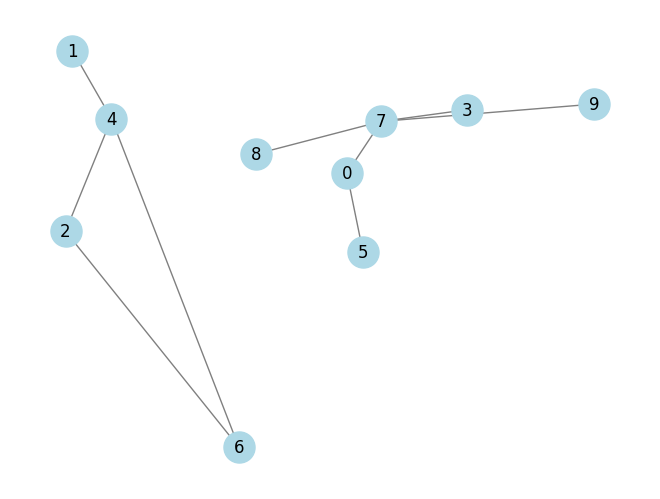

In [19]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

def generate_map(n):
    """Generate a random map-coloring instance with n regions as a graph."""
    points = [(random.random(), random.random()) for _ in range(n)]
    graph = nx.Graph()
    
    # Add nodes
    for i, (x, y) in enumerate(points):
        graph.add_node(i, pos=(x, y))
    
    # Connect nearest neighbors while avoiding edge crossings
    edges = []
    for i in range(n):
        min_dist = float('inf')
        best_neighbor = None
        for j in range(n):
            if i != j and (i, j) not in edges and (j, i) not in edges:
                d = math.dist(points[i], points[j])
                if d < min_dist and not does_intersect(i, j, edges, points):
                    min_dist = d
                    best_neighbor = j
        if best_neighbor is not None:
            edges.append((i, best_neighbor))
            graph.add_edge(i, best_neighbor)
    
    return graph, points

def does_intersect(i, j, edges, points):
    """Check if line (i, j) crosses any existing edges."""
    x1, y1 = points[i]
    x2, y2 = points[j]
    for a, b in edges:
        x3, y3 = points[a]
        x4, y4 = points[b]
        if segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
            return True
    return False

def segments_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    """Check if two line segments (x1,y1)-(x2,y2) and (x3,y3)-(x4,y4) intersect."""
    def ccw(A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])
    
    A, B, C, D = (x1, y1), (x2, y2), (x3, y3), (x4, y4)
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

def draw_graph(graph, points):
    """Visualize the generated map graph."""
    pos = {i: points[i] for i in range(len(points))}
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.show()

# Example usage
n = 10  # Change this value to test with more points
graph, points = generate_map(n)
draw_graph(graph, points)


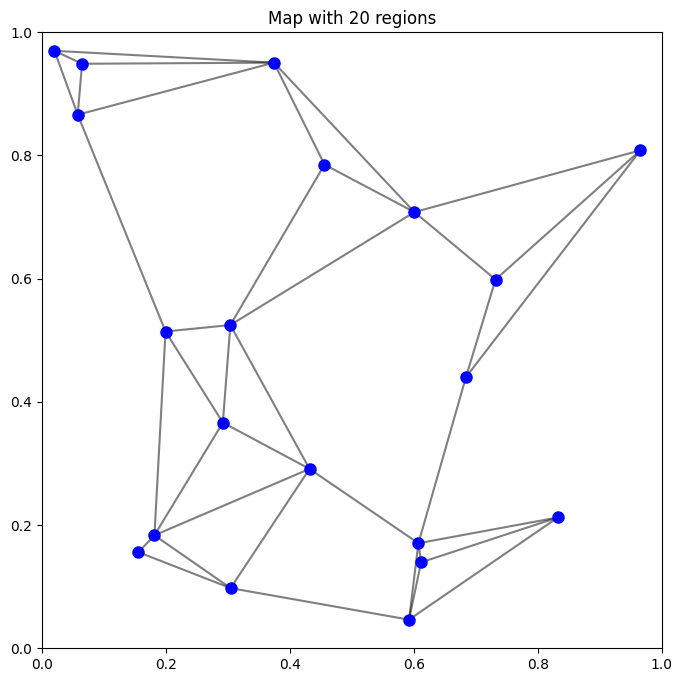

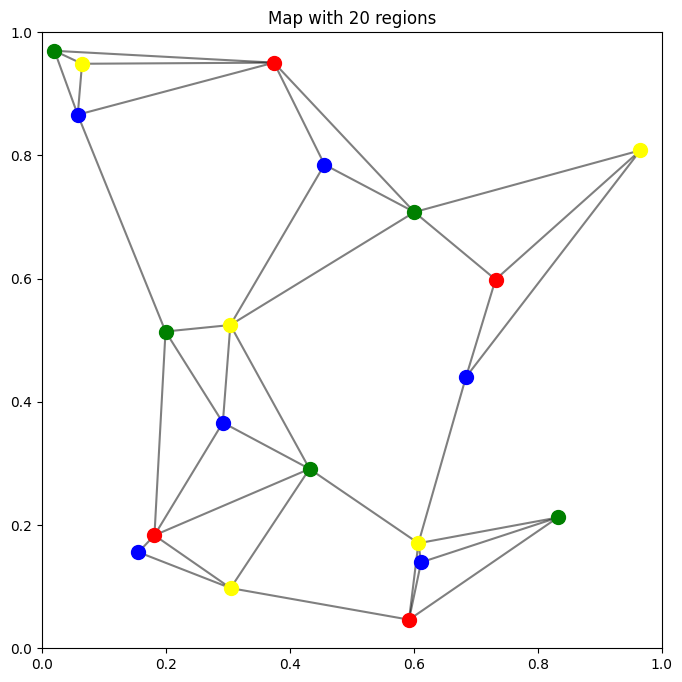

Solution found with 4 colors
n=10, k=3, Min-Conflicts: avg_time=0.000000s, success_rate=1.0
n=10, k=3, Backtracking: avg_time=0.000000s, success_rate=0.6
n=10, k=3, Backtracking+FC: avg_time=0.000000s, success_rate=0.4
n=10, k=3, Backtracking+MAC: avg_time=0.000000s, success_rate=0.8
n=10, k=4, Min-Conflicts: avg_time=0.000501s, success_rate=1.0
n=10, k=4, Backtracking: avg_time=0.000000s, success_rate=1.0
n=10, k=4, Backtracking+FC: avg_time=0.000000s, success_rate=1.0
n=10, k=4, Backtracking+MAC: avg_time=0.000300s, success_rate=1.0
n=15, k=3, Min-Conflicts: avg_time=0.000333s, success_rate=0.6
n=15, k=3, Backtracking: avg_time=0.000000s, success_rate=0.4
n=15, k=3, Backtracking+FC: avg_time=0.000000s, success_rate=0.6
n=15, k=3, Backtracking+MAC: avg_time=0.002529s, success_rate=0.6
n=15, k=4, Min-Conflicts: avg_time=0.000000s, success_rate=1.0
n=15, k=4, Backtracking: avg_time=0.000000s, success_rate=1.0
n=15, k=4, Backtracking+FC: avg_time=0.000000s, success_rate=1.0
n=15, k=4, Ba

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict, deque
import random

class MapColoringProblem:
    def __init__(self, n_points):
        """Initialize a random map coloring problem with n_points regions."""
        self.n_points = n_points
        self.points = np.random.rand(n_points, 2)  # Random points in unit square
        self.neighbors = defaultdict(list)
        self.generate_connections()
        
    def distance(self, p1, p2):
        """Calculate Euclidean distance between two points."""
        return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    
    def lines_intersect(self, p1, p2, p3, p4):
        """Check if line segments p1-p2 and p3-p4 intersect."""
        def ccw(a, b, c):
            return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])
        
        return ccw(p1, p3, p4) != ccw(p2, p3, p4) and ccw(p1, p2, p3) != ccw(p1, p2, p4)
    
    def generate_connections(self):
        """Generate connections between points to create a planar graph."""
        # List to store created connections
        connections = []
        
        # Try to add connections until no more are possible
        possible_connections = True
        while possible_connections:
            possible_connections = False
            
            # Select a random point
            i = np.random.randint(0, self.n_points)
            
            # Sort other points by distance
            distances = []
            for j in range(self.n_points):
                if j != i and j not in self.neighbors[i]:
                    distances.append((j, self.distance(self.points[i], self.points[j])))
            
            distances.sort(key=lambda x: x[1])
            
            # Try to connect to the closest point that doesn't create intersection
            for j, _ in distances:
                # Check if adding this connection would create an intersection
                valid_connection = True
                for c1, c2 in connections:
                    if (i == c1 or i == c2 or j == c1 or j == c2):
                        continue  # Skip if connections share an endpoint
                    
                    if self.lines_intersect(self.points[i], self.points[j], 
                                          self.points[c1], self.points[c2]):
                        valid_connection = False
                        break
                
                if valid_connection:
                    self.neighbors[i].append(j)
                    self.neighbors[j].append(i)
                    connections.append((i, j))
                    possible_connections = True
                    break
    
    def plot_map(self, colors=None):
        """Plot the map with optional coloring."""
        plt.figure(figsize=(8, 8))
        
        # Plot connections
        for i in range(self.n_points):
            for j in self.neighbors[i]:
                if i < j:  # Avoid plotting twice
                    plt.plot([self.points[i, 0], self.points[j, 0]],
                             [self.points[i, 1], self.points[j, 1]], 'k-', alpha=0.5)
        
        # Plot points with colors if provided
        if colors:
            color_map = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
            for i in range(self.n_points):
                plt.plot(self.points[i, 0], self.points[i, 1], 'o', 
                         color=color_map[colors[i] % len(color_map)], markersize=10)
        else:
            plt.plot(self.points[:, 0], self.points[:, 1], 'bo', markersize=8)
            
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f"Map with {self.n_points} regions")
        plt.show()
    
    def min_conflicts(self, k, max_steps=1000):
        """Solve using min-conflicts algorithm."""
        # Initialize with random assignment
        colors = [random.randint(0, k-1) for _ in range(self.n_points)]
        
        for _ in range(max_steps):
            # Check if solution is valid
            conflicts = False
            conflict_vars = []
            
            for i in range(self.n_points):
                has_conflict = False
                for j in self.neighbors[i]:
                    if colors[i] == colors[j]:
                        conflicts = True
                        has_conflict = True
                        break
                if has_conflict:
                    conflict_vars.append(i)
            
            if not conflicts:
                return colors  # Solution found
            
            # Choose a random variable with conflicts
            if not conflict_vars:
                break  # No conflicts but didn't return? Should not happen.
                
            var = random.choice(conflict_vars)
            
            # Find min-conflict value
            min_conflicts = float('inf')
            min_conflict_values = []
            
            for color in range(k):
                conflicts = 0
                for neighbor in self.neighbors[var]:
                    if color == colors[neighbor]:
                        conflicts += 1
                
                if conflicts < min_conflicts:
                    min_conflicts = conflicts
                    min_conflict_values = [color]
                elif conflicts == min_conflicts:
                    min_conflict_values.append(color)
            
            # Choose randomly among best values
            colors[var] = random.choice(min_conflict_values)
        
        return None  # No solution found
    
    def backtracking(self, k):
        """Solve using backtracking."""
        colors = [-1] * self.n_points
        
        def is_safe(vertex, color):
            for neighbor in self.neighbors[vertex]:
                if colors[neighbor] == color:
                    return False
            return True
        
        def backtrack(vertex):
            if vertex == self.n_points:
                return True
            
            for color in range(k):
                if is_safe(vertex, color):
                    colors[vertex] = color
                    if backtrack(vertex + 1):
                        return True
                    colors[vertex] = -1
            
            return False
        
        if backtrack(0):
            return colors
        return None
    
    def backtracking_fc(self, k):
        """Solve using backtracking with forward checking."""
        colors = [-1] * self.n_points
        # For each vertex, keep track of available colors
        available = [list(range(k)) for _ in range(self.n_points)]
        
        def forward_check(vertex, color):
            """Forward check after assigning color to vertex.
            Returns a tuple (success, saved_domains) where:
            - success is a boolean indicating whether forward checking succeeds
            - saved_domains is a dictionary mapping neighbors to removed colors
            """
            saved_domains = {}
            
            for neighbor in self.neighbors[vertex]:
                if colors[neighbor] == -1:  # Unassigned neighbor
                    if color in available[neighbor]:
                        if neighbor not in saved_domains:
                            saved_domains[neighbor] = []
                        saved_domains[neighbor].append(color)
                        available[neighbor].remove(color)
                        if len(available[neighbor]) == 0:
                            # Restore domains before returning
                            for v, removed_colors in saved_domains.items():
                                for c in removed_colors:
                                    available[v].append(c)
                            return False, {}
            
            return True, saved_domains
        
        def backtrack(vertex):
            if vertex == self.n_points:
                return True
            
            for color in range(k):
                if color in available[vertex]:
                    colors[vertex] = color
                    
                    success, saved_domains = forward_check(vertex, color)
                    if success:
                        if backtrack(vertex + 1):
                            return True
                    
                    # Restore available colors
                    for v, removed_colors in saved_domains.items():
                        for c in removed_colors:
                            available[v].append(c)
                    
                    colors[vertex] = -1
            
            return False
        
        if backtrack(0):
            return colors
        return None
    
    def backtracking_mac(self, k):
        """Solve using backtracking with maintaining arc consistency (MAC)."""
        colors = [-1] * self.n_points
        # For each vertex, keep track of available colors
        domains = [set(range(k)) for _ in range(self.n_points)]
        
        def remove_inconsistent_values(xi, xj):
            """Remove values from domain of xi that are inconsistent with xj."""
            removed = False
            
            if colors[xj] != -1:  # xj is assigned
                if colors[xj] in domains[xi]:
                    domains[xi].remove(colors[xj])
                    removed = True
            
            return removed
        
        def ac3(arcs=None):
            """Establish arc consistency."""
            if arcs is None:
                # Initialize with all arcs
                arcs = [(i, j) for i in range(self.n_points) for j in self.neighbors[i]]
            
            queue = deque(arcs)
            while queue:
                xi, xj = queue.popleft()
                
                if remove_inconsistent_values(xi, xj):
                    if len(domains[xi]) == 0:
                        return False
                    
                    # Add all arcs pointing to xi
                    for xk in self.neighbors[xi]:
                        if xk != xj:
                            queue.append((xk, xi))
            
            return True
        
        def backtrack(vertex):
            if vertex == self.n_points:
                return True
            
            # Make a copy of domains
            old_domains = [d.copy() for d in domains]
            
            for color in list(domains[vertex]):
                colors[vertex] = color
                
                # Create temporary domain for inference
                domains[vertex] = {color}
                
                # Add arcs from neighbors to current vertex
                arcs = [(neighbor, vertex) for neighbor in self.neighbors[vertex]]
                
                if ac3(arcs):
                    if backtrack(vertex + 1):
                        return True
                
                # Restore domains
                for i in range(self.n_points):
                    domains[i] = old_domains[i].copy()
                
                colors[vertex] = -1
            
            return False
        
        # Initial AC3
        if ac3():
            if backtrack(0):
                return colors
        
        return None

def run_experiments(n_values, k_values, num_trials=5):
    """Run experiments for different n values and algorithms."""
    algorithms = [
        ("Min-Conflicts", lambda p, k: p.min_conflicts(k)),
        ("Backtracking", lambda p, k: p.backtracking(k)),
        ("Backtracking+FC", lambda p, k: p.backtracking_fc(k)),
        ("Backtracking+MAC", lambda p, k: p.backtracking_mac(k))
    ]
    
    results = {}
    
    for n in n_values:
        results[n] = {}
        for k in k_values:
            results[n][k] = {}
            for name, algo in algorithms:
                times = []
                success = 0
                
                for _ in range(num_trials):
                    problem = MapColoringProblem(n)
                    start_time = time.time()
                    solution = algo(problem, k)
                    end_time = time.time()
                    
                    if solution:
                        times.append(end_time - start_time)
                        success += 1
                    
                # Calculate average time only for successful runs
                avg_time = sum(times) / len(times) if times else float('inf')
                success_rate = success / num_trials
                
                results[n][k][name] = (avg_time, success_rate)
                
                print(f"n={n}, k={k}, {name}: avg_time={avg_time:.6f}s, success_rate={success_rate}")
                
    return results

def display_results_table(results, n_values, k_values, algorithms):
    """Display results in a nicely formatted table."""
    header = "n | k | " + " | ".join(algo for algo in algorithms)
    separator = "-" * len(header)
    
    print(separator)
    print(header)
    print(separator)
    
    for n in n_values:
        for k in k_values:
            row = f"{n} | {k} | "
            for algo in algorithms:
                avg_time, success_rate = results[n][k][algo]
                if avg_time == float('inf'):
                    row += f"timeout ({success_rate*100:.0f}%) | "
                else:
                    row += f"{avg_time:.6f}s ({success_rate*100:.0f}%) | "
            print(row[:-3])  # Remove the last " | "
    
    print(separator)

if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    random.seed(42)
    
    # Example of creating and visualizing a problem
    problem = MapColoringProblem(20)
    problem.plot_map()
    
    # Solve with k=4 colors
    colors = problem.min_conflicts(4)
    if colors:
        problem.plot_map(colors)
        print("Solution found with 4 colors")
    else:
        print("No solution found with 4 colors")
    
    # Run experiments
    n_values = [10, 15, 20, 25, 30]
    k_values = [3, 4]
    algorithms = ["Min-Conflicts", "Backtracking", "Backtracking+FC", "Backtracking+MAC"]
    
    results = run_experiments(n_values, k_values)
    display_results_table(results, n_values, k_values, algorithms)

### Question 3

In [7]:
import time  

def evaluate_board(board):  
    n = len(board)  
    # Check rows and columns  
    for i in range(n):  
        if all(board[i][j] == 'x' for j in range(n)):  
            return 10  # Player wins  
        if all(board[j][i] == 'x' for j in range(n)):  
            return 10  # Player wins  
        if all(board[i][j] == 'o' for j in range(n)):  
            return -10  # Opponent wins  
        if all(board[j][i] == 'o' for j in range(n)):  
            return -10  # Opponent wins  

    # Check diagonals  
    if all(board[i][i] == 'x' for i in range(n)):  
        return 10  # Player wins  
    if all(board[i][i] == 'o' for i in range(n)):  
        return -10  # Opponent wins  
    if all(board[i][n - 1 - i] == 'x' for i in range(n)):  
        return 10  # Player wins  
    if all(board[i][n - 1 - i] == 'o' for i in range(n)):  
        return -10  # Opponent wins  

    # Check for tie  
    if all(board[i][j] != '_' for i in range(n) for j in range(n)):  
        return 0  # Tie  

    return None  # Game is still ongoing  

def minimax(board, depth, is_maximizing):  
    score = evaluate_board(board)  
    if score is not None:  
        return score  

    if is_maximizing:  
        best_value = -float('inf')  
        for i in range(len(board)):  
            for j in range(len(board)):  
                if board[i][j] == '_':  
                    board[i][j] = 'x'  
                    value = minimax(board, depth + 1, False)  
                    board[i][j] = '_'  
                    best_value = max(best_value, value)  
        return best_value  
    else:  
        best_value = float('inf')  
        for i in range(len(board)):  
            for j in range(len(board)):  
                if board[i][j] == '_':  
                    board[i][j] = 'o'  
                    value = minimax(board, depth + 1, True)  
                    board[i][j] = '_'  
                    best_value = min(best_value, value)  
        return best_value  

def alpha_beta(board, depth, alpha, beta, is_maximizing):  
    score = evaluate_board(board)  
    if score is not None:  
        return score  

    if is_maximizing:  
        best_value = -float('inf')  
        for i in range(len(board)):  
            for j in range(len(board)):  
                if board[i][j] == '_':  
                    board[i][j] = 'x'  
                    value = alpha_beta(board, depth + 1, alpha, beta, False)  
                    board[i][j] = '_'  
                    best_value = max(best_value, value)  
                    alpha = max(alpha, best_value)  
                    if beta <= alpha:  
                        break  
        return best_value  
    else:  
        best_value = float('inf')  
        for i in range(len(board)):  
            for j in range(len(board)):  
                if board[i][j] == '_':  
                    board[i][j] = 'o'  
                    value = alpha_beta(board, depth + 1, alpha, beta, True)  
                    board[i][j] = '_'  
                    best_value = min(best_value, value)  
                    beta = min(beta, best_value)  
                    if beta <= alpha:  
                        break  
        return best_value  

def findOptimalMove(board, method):  
    best_value = -float('inf')  
    best_move = (-1, -1)  
    
    for i in range(len(board)):  
        for j in range(len(board)):  
            if board[i][j] == '_':  
                board[i][j] = 'x'  # Try the move  
                if method == 'minimax':  
                    move_value = minimax(board, 0, False)  
                else:  # alpha_beta  
                    move_value = alpha_beta(board, 0, -float('inf'), float('inf'), False)  
                board[i][j] = '_'  # Undo the move  
                
                if move_value > best_value or (move_value == best_value and j < best_move[1]):  
                    best_value = move_value  
                    best_move = (i, j)  

    return best_move, best_value  

# Test the implementation  
board = [  
    ['x', 'o', 'x', 'o', 'x'],  
    ['o', 'o', 'x', 'x', 'x'],  
    ['o', 'o', 'x', 'x', 'x'],  
    ['o', 'o', 'o', 'x', 'x'],  
    ['_', '_', '_', '_', '_']  
]  

t = time.time()  
optimal = findOptimalMove(board, method='minimax')  
print("The value of the best Move is:", optimal[1])  
print("The Optimal Move using minimax is:")  
print("ROW:", optimal[0][0], " COL:", optimal[0][1])  
print("time taken by minimax:", time.time() - t)  

print("<------------------------------------------------------------>")  

t = time.time()  
optimal = findOptimalMove(board, method='alpha_beta')  
print("The value of the best Move is:", optimal[1])  
print("The Optimal Move using alpha beta pruning is:")  
print("ROW:", optimal[0][0], " COL:", optimal[0][1])  
print("time taken by minimax with alpha beta pruning:", time.time() - t)  

The value of the best Move is: 10
The Optimal Move using minimax is:
ROW: 4  COL: 4
time taken by minimax: 0.005529642105102539
<------------------------------------------------------------>
The value of the best Move is: 10
The Optimal Move using alpha beta pruning is:
ROW: 4  COL: 4
time taken by minimax with alpha beta pruning: 0.004998922348022461


### Quiz 4

In [2]:
import heapq  

def find_community_with_minimum_friends(n, edges, max_sos):  
    # Create an adjacency list to represent the graph  
    graph = {i: [] for i in range(n)}  
    
    for src, dest, sos in edges:  
        graph[src].append((dest, sos))  
        graph[dest].append((src, sos))  # Since the graph is bidirectional  

    # Function to perform Dijkstra's algorithm  
    def dijkstra(source):  
        min_heap = [(0, source)]  # (sos_score, community)  
        distances = {i: float('inf') for i in range(n)}  
        distances[source] = 0  
        reachable_friends = 0  
        
        while min_heap:  
            current_sos, current_community = heapq.heappop(min_heap)  
            
            # If we've already found a smaller distance before, skip processing  
            if current_sos > distances[current_community]:  
                continue  

            # Count reachable friends within max_sos  
            if current_sos <= max_sos:  
                reachable_friends += 1  
            
            for neighbor, weight in graph[current_community]:  
                new_sos = current_sos + weight  
                # Relaxation step  
                if new_sos < distances[neighbor]:  
                    distances[neighbor] = new_sos  
                    heapq.heappush(min_heap, (new_sos, neighbor))  

        return reachable_friends  

    # Store the number of friends for each community  
    friends_count = {}  

    for community in range(n):  
        friends_count[community] = dijkstra(community)  

    # Find the minimum number of friends  
    min_friends = min(friends_count.values())  

    # Collect communities that have the minimum number of friends  
    communities_needing_help = [community for community, count in friends_count.items() if count == min_friends]  

    return communities_needing_help  

# Test the function with the provided input  
n = 5  
edges = [[0, 1, 4], [1, 2, 2], [1, 3, 1], [2, 3, 4], [3, 4, 2], [1, 4, 2], [0, 4, 1]]  
max_sos = 4  

result = find_community_with_minimum_friends(n, edges, max_sos)  
print(result)  # Expected output: [0, 2]  

[0, 2]


In [6]:
import heapq

def find_community_with_minimum_friends(n, edges, max_sos):
    '''
    :type n: int
    :type edges: List[List[int]]
    :type max_sos: int
    :rtype: List[int]
    '''
    from collections import defaultdict
    
    # Step 1: Create adjacency list representation of the graph
    graph = defaultdict(list)
    for u, v, weight in edges:
        graph[u].append((v, weight))
        graph[v].append((u, weight))  # Since it's bidirectional
    
    def dijkstra(source):
        '''Find shortest path distances using Dijkstra's Algorithm.'''
        min_heap = [(0, source)]  # (sos_score, node)
        distances = {i: float('inf') for i in range(n)}
        distances[source] = 0
        
        while min_heap:
            cur_dist, node = heapq.heappop(min_heap)
            if cur_dist > distances[node]:
                continue
            for neighbor, weight in graph[node]:
                new_dist = cur_dist + weight
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    heapq.heappush(min_heap, (new_dist, neighbor))
        
        return distances
    
    # Step 2: Calculate reachable friends for each community
    friend_counts = {}
    for community in range(n):
        shortest_paths = dijkstra(community)
        friend_counts[community] = sum(1 for d in shortest_paths.values() if 0 < d <= max_sos)
    
    # Step 3: Find the minimum number of friends
    min_friends = min(friend_counts.values())
    
    # Step 4: Get communities with the minimum number of friends
    return [community for community, count in friend_counts.items() if count == min_friends]

# Example Test Case
n = 5
edges = [[0, 1, 4], [1, 2, 2], [1, 3, 1], [2, 3, 4], [3, 4, 2], [1, 4, 2], [0, 4, 1]]
max_sos = 4

find_community_with_minimum_friends(n, edges, max_sos)


[0, 2]

In [3]:
from collections import defaultdict

def find_community_with_minimum_friends(n, edges, max_sos):
    '''
    :type n: int
    :type edges: List[List[int]]
    :type max_sos: int
    :rtype: communities: List[int]
    '''
    # Create adjacency list
    graph = defaultdict(list)
    for u, v, w in edges:
        if w <= max_sos:
            graph[u].append(v)
            graph[v].append(u)
    
    # Count friends for each community
    friend_counts = {i: len(graph[i]) for i in range(n)}
    
    # Find minimum number of friends
    min_friends = min(friend_counts.values())
    
    # Find communities with the minimum number of friends
    communities = [node for node, count in friend_counts.items() if count == min_friends]
    
    return communities

# Example test case
n = 5 
edges = [[0, 1, 4], [1, 2, 2], [1, 3, 1], [2, 3, 4], [3, 4, 2], [1, 4, 2], [0, 4, 1]]
max_sos = 4

print(find_community_with_minimum_friends(n, edges, max_sos))


[0, 2]


### Quez 5

In [23]:
import heapq
import copy

# Define class Node
class Node:
    def __init__(self, data, parent, level, fval):
        """ Initialize the node with the data, parent, level and fvalue """
        self.data = data
        self.parent = parent
        self.level = level
        self.fval = fval

    def __lt__(self, other):
        return self.fval < other.fval

class NPuzzle:
    def __init__(self, size):
        """ Initialize the puzzle params"""
        self.n = size  # number of rows/columns in the puzzle board
        self.pq = []
        self.visited = set()

    def take_input(self):
        """ takes state input from the user """
        p = []
        for _ in range(self.n):
            p.append(input().split(" "))
        return p

    def find_blank_tile(self, state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == '_':
                    return i, j

    def move_tile(self, state, x1, y1, x2, y2):
        new_state = copy.deepcopy(state)
        new_state[x1][y1], new_state[x2][y2] = new_state[x2][y2], new_state[x1][y1]
        return new_state

    def generate_child(self, node):
        children = []
        x, y = self.find_blank_tile(node.data)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in moves:
            newx, newy = x + dx, y + dy
            if 0 <= newx < self.n and 0 <= newy < self.n:
                new_state = self.move_tile(node.data, x, y, newx, newy)
                children.append(Node(new_state, node, node.level + 1, 0))
        return children

    def manhattan_distance(self, start, goal):
        distance = 0
        goal_dict = {goal[i][j]: (i, j) for i in range(self.n) for j in range(self.n)}
        for i in range(self.n):
            for j in range(self.n):
                if start[i][j] != '_':
                    goal_x, goal_y = goal_dict[start[i][j]]
                    distance += abs(i - goal_x) + abs(j - goal_y)
        return distance

    def f_score(self, start, goal):
        return start.level + self.manhattan_distance(start.data, goal)

    def print_state(self, state):
        print("  | \n  | \n \'/ \n")
        for row in state:
            print(" ".join(row))
        print("\n")

    def process(self):
        """ Accept Start and Goal Puzzle states"""
        print("Enter the start state matrix \n")
        start = self.take_input()
        print("Enter the goal state matrix \n")
        goal = self.take_input()
        print("\n")

        start = Node(start, None, 0, 0)
        start.fval = self.f_score(start, goal)
        heapq.heappush(self.pq, start)

        while True:
            cur = heapq.heappop(self.pq)
            self.print_state(cur.data)
            if cur.data == goal:
                break
            self.visited.add(tuple(map(tuple, cur.data)))
            
            for child in self.generate_child(cur):
                if tuple(map(tuple, child.data)) not in self.visited:
                    child.fval = self.f_score(child, goal)
                    heapq.heappush(self.pq, child)

p = NPuzzle(3)
p.process()


Enter the start state matrix 

Enter the goal state matrix 



  | 
  | 
 '/ 

1 _ 3
4 2 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 _ 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 _
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 6
7 8 _




In [24]:
import heapq
import copy

# Define class Node
class Node:
    def __init__(self, data, parent, level, fval):
        """ Initialize the node with the data, parent, level and fvalue """
        self.data = data
        self.parent = parent
        self.level = level
        self.fval = fval

    def __lt__(self, other):
        return self.fval < other.fval

class NPuzzle:
    def __init__(self,size):
        """ Initialize the puzzle params"""
        self.n = size #this is the number of rows/columns in the puzzle board
        self.pq = []
        self.visited = set()

    def take_input(self):
        """ takes state input from the user """
        p = []
        for i in range(self.n):
            temp = input().split()
            p.append(temp)
        return p
    
    # Find the blank tile in the puzzle
    def find_blank_tile(self,state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == '_':
                    return i,j
    
    # Move the tile in the given direction and if the position is valid
    def move_tile(self,state,x1,y1,x2,y2):
         new_state = copy.deepcopy(state)
         new_state[x1][y1],new_state[x2][y2] = new_state[x2][y2],new_state[x1][y1]
         return new_state
    
    # Generate the children nodes of the current node
    def generate_child(self,node):
        children = []
        x,y = self.find_blank_tile(node.data)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in moves:
            newx, newy = x + dx, y + dy
            if 0 <= newx < self.n and 0 <= newy < self.n:
                new_state = self.move_tile(node.data,x,y,newx,newy)
                child = Node(new_state,node,node.level+1,0)
                children.append(child)
        return children
    
    # Manhattan distance heuristic
    def manhattan_distance(self,start,goal):
        distance = 0
        goal_dict = {goal[i][j]:(i,j) for i in range(self.n) for j in range(self.n)}
        for i in range(self.n):
            for j in range(self.n):
                if start[i][j] != '_':
                    goal_x,goal_y = goal_dict[start[i][j]]
                    distance += abs(i-goal_x) + abs(j-goal_y)
        return distance
    
    def f_score(self,start,goal):
        """ Heuristic Function to calculate heuristic value f(x)"""
        return start.level + self.manhattan_distance(start.data,goal)
    
    # Print the path from the start node to the goal node
    def print_state(self, state):
        print("  | \n  | \n \'/ \n")
        for row in state:
            print(" ".join(row))
        print("\n")
    
    def process(self):
        """ Accept Start and Goal Puzzle states"""
        print("Enter the start state matrix \n")
        start = self.take_input()
        for row in start:
            print(" ".join(row))
        print("Enter the goal state matrix \n")        
        goal = self.take_input()
        for row in goal:
            print(" ".join(row))
        print("\n")
        
        start = Node(start,None,0,0)
        start.fval = self.f_score(start,goal) #calculate heuristic value
        
        # Put the start node in the priority queue
        heapq.heappush(self.pq,start)

        # Start solving the puzzle
        while True:
            cur = heapq.heappop(self.pq) #get current state to explore
            self.print_state(cur.data)
            if cur.data == goal:
                break
            self.visited.add(tuple(map(tuple,cur.data))) #mark the current state as visited

            for child in self.generate_child(cur):
                if tuple(map(tuple,child.data)) not in self.visited:
                    child.fval = self.f_score(child,goal)
                    heapq.heappush(self.pq,child)

p = NPuzzle(3)
p.process()


Enter the start state matrix 

1 _ 3
4 2 5
7 8 6
Enter the goal state matrix 

1 2 3
4 5 6
7 8 _


  | 
  | 
 '/ 

1 _ 3
4 2 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 _ 5
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 _
7 8 6


  | 
  | 
 '/ 

1 2 3
4 5 6
7 8 _




In [3]:
import heapq
import copy

class Node:
    def __init__(self, data, parent, level, fval):
        self.data = data  # The puzzle state
        self.parent = parent  # Parent node
        self.level = level  # Depth level in the search tree
        self.fval = fval  # f(n) = g(n) + h(n)
    
    def __lt__(self, other):
        return self.fval < other.fval

class NPuzzle:
    def __init__(self, size):
        self.n = size  # Grid size
        self.pq = []  # Priority queue for A* search
        self.visited = set()  # To track visited states
    
    def take_input(self):
        p = []
        for _ in range(self.n):
            temp = input().split(" ")
            p.append(temp)
        return p
    
    def find_blank(self, state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == "_":
                    return i, j
        print("Error: Blank tile not found!")
        return None
    
    def move_tile(self, state, x1, y1, x2, y2):
        new_state = copy.deepcopy(state)
        new_state[x1][y1], new_state[x2][y2] = new_state[x2][y2], new_state[x1][y1]
        return new_state
    
    def generate_children(self, node):
        children = []
        blank_position = self.find_blank(node.data)
        if blank_position is None:
            return []
        x, y = blank_position
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in moves:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.n and 0 <= new_y < self.n:
                new_state = self.move_tile(node.data, x, y, new_x, new_y)
                children.append(Node(new_state, node, node.level + 1, 0))
        return children
    
    def manhattan_distance(self, start, goal):
        dist = 0
        goal_positions = {goal[i][j]: (i, j) for i in range(self.n) for j in range(self.n)}
        for i in range(self.n):
            for j in range(self.n):
                if start[i][j] != "_":
                    goal_x, goal_y = goal_positions[start[i][j]]
                    dist += abs(i - goal_x) + abs(j - goal_y)
        return dist
    
    def f_score(self, start, goal):
        return start.level + self.manhattan_distance(start.data, goal)
    
    def print_state(self, state):
        for row in state:
            print(" ".join(row))
        print("\n")
    
    def process(self):
        print("Enter the start state matrix \n")
        start_state = self.take_input()
        print("Start State:")
        self.print_state(start_state)
        
        print("Enter the goal state matrix \n")
        goal_state = self.take_input()
        print("Goal State:")
        self.print_state(goal_state)
        
        start_node = Node(start_state, None, 0, 0)
        start_node.fval = self.f_score(start_node, goal_state)
        heapq.heappush(self.pq, start_node)
        
        print("\n\n")
        while self.pq:
            cur_node = heapq.heappop(self.pq)
            self.print_state(cur_node.data)
            if cur_node.data == goal_state:
                break
            self.visited.add(tuple(map(tuple, cur_node.data)))
            
            for child in self.generate_children(cur_node):
                if tuple(map(tuple, child.data)) not in self.visited:
                    child.fval = self.f_score(child, goal_state)
                    heapq.heappush(self.pq, child)

p = NPuzzle(3)
p.process()


Enter the start state matrix 

Start State:
1 _ 3
4 2 5
7 8 6


Enter the goal state matrix 

Goal State:
1 2 3
4 5 6
7 8 _





1 _ 3
4 2 5
7 8 6


1 2 3
4 _ 5
7 8 6


1 2 3
4 5 _
7 8 6


1 2 3
4 5 6
7 8 _




In [24]:
import heapq
from copy import deepcopy

class Node:
    def __init__(self, data, level, fval, parent=None):
        self.data = data
        self.level = level
        self.fval = fval
        self.parent = parent
    
    def __lt__(self, other):
        return self.fval < other.fval

def manhattan_distance(start, goal):
    n = len(start)
    distance = 0
    for i in range(n):
        for j in range(n):
            if start[i][j] != 0:
                x, y = divmod(goal.index(start[i][j]), n)
                distance += abs(x - i) + abs(y - j)
    return distance

class NPuzzle:
    def __init__(self, size):
        self.n = size
        self.open_list = []
        self.closed_list = set()
    
    def take_input(self):
        puzzle = []
        for _ in range(self.n):
            puzzle.append(list(map(int, input().split())))
        return puzzle
    
    def find_blank(self, state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == 0:
                    return i, j
    
    def generate_moves(self, node, goal_flat):
        x, y = self.find_blank(node.data)
        moves = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if 0 <= new_x < self.n and 0 <= new_y < self.n:
                new_state = deepcopy(node.data)
                new_state[x][y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[x][y]
                new_node = Node(new_state, node.level + 1, 0, node)
                new_node.fval = new_node.level + manhattan_distance(new_state, goal_flat)
                moves.append(new_node)
        return moves
    
    def print_solution(self, node):
        path = []
        while node:
            path.append(node.data)
            node = node.parent
        path.reverse()
        for state in path:
            print("\n  | \n  | \n \'/ ")
            for row in state:
                print(" ".join(map(str, row)))
    
    def process(self):
        print("Enter the start state matrix:")
        start = self.take_input()
        print("Enter the goal state matrix:")
        goal = self.take_input()
        
        goal_flat = [num for row in goal for num in row]
        start_node = Node(start, 0, manhattan_distance(start, goal_flat))
        
        heapq.heappush(self.open_list, start_node)
        while self.open_list:
            current_node = heapq.heappop(self.open_list)
            self.closed_list.add(tuple(map(tuple, current_node.data)))
            
            if current_node.data == goal:
                self.print_solution(current_node)
                return
            
            for move in self.generate_moves(current_node, goal_flat):
                if tuple(map(tuple, move.data)) not in self.closed_list:
                    heapq.heappush(self.open_list, move)

# Example Usage
size = int(input("Enter puzzle size (e.g., 3 for 8-puzzle, 4 for 15-puzzle): "))
puzzle = NPuzzle(size)
puzzle.process()


Enter the start state matrix:
Enter the goal state matrix:

  | 
  | 
 '/ 
1 0 3
4 2 5
7 8 6

  | 
  | 
 '/ 
1 2 3
4 0 5
7 8 6

  | 
  | 
 '/ 
1 2 3
4 5 0
7 8 6

  | 
  | 
 '/ 
1 2 3
4 5 6
7 8 0


### Ques 6

In [8]:
import heapq

def prims_algorithm(graph):
    """
    :param graph: List of Lists (Adjacency Matrix)
    :return: Prints the edges in the Minimum Spanning Tree with weights
    """
    n = len(graph)
    visited = set()
    mst_edges = []  # To store edges in MST
    min_heap = []
    
    # Start from node 0
    visited.add(0)
    
    # Push all edges from node 0 into the heap
    for neighbor in range(n):
        if graph[0][neighbor] > 0:  # Valid edge
            heapq.heappush(min_heap, (graph[0][neighbor], 0, neighbor))  # (weight, src, dest)

    while len(visited) < n:
        # Extract the smallest edge
        weight, src, dest = heapq.heappop(min_heap)

        if dest in visited:
            continue  # Skip if already in MST

        # Add edge to MST
        mst_edges.append((src, dest, weight))
        visited.add(dest)

        # Push all edges from the new node into the heap
        for neighbor in range(n):
            if graph[dest][neighbor] > 0 and neighbor not in visited:
                heapq.heappush(min_heap, (graph[dest][neighbor], dest, neighbor))

    # Print the MST edges
    print("Edge Weight")
    for src, dest, weight in mst_edges:
        print(f"{src} - {dest} {weight}")

# Example Input
graph1 = [
    [0, 9, 0, 1, 0],
    [2, 0, 3, 7, 5],
    [0, 3, 0, 0, 7],
    [4, 8, 1, 0, 9],
    [0, 3, 6, 9, 0]
]

graph2 = [
    [0, 2, 0, 1, 0], 
    [2, 0, 3, 8, 5], 
    [0, 3, 0, 0, 1], 
    [1, 8, 0, 0, 9], 
    [0, 5, 1, 9, 0]
]

# Running the function
print("MST for Graph 1:")
prims_algorithm(graph1)

print("\nMST for Graph 2:")
prims_algorithm(graph2)


MST for Graph 1:
Edge Weight
0 - 3 1
3 - 2 1
2 - 1 3
1 - 4 5

MST for Graph 2:
Edge Weight
0 - 3 1
0 - 1 2
1 - 2 3
2 - 4 1


In [ ]:
import heapq

def primMST(graph):
    num_nodes = len(graph)
    visited = [False] * num_nodes
    # (weight, current_node, parent_node)
    min_heap = [(0, 0, -1)]  
    mst_edges = []
    total_weight = 0
    
    while len(mst_edges) < num_nodes - 1:
        weight, current, parent = heapq.heappop(min_heap)
        
        if visited[current]:
            continue
        
        visited[current] = True
        if parent != -1:
            mst_edges.append((parent, current, weight))
            total_weight += weight
        
        for neighbor, edge_weight in enumerate(graph[current]):
            if edge_weight > 0 and not visited[neighbor]:
                heapq.heappush(min_heap, (edge_weight, neighbor, current))
    
    print("Edge\tWeight")
    for u, v, w in mst_edges:
        print(f"{u} - {v}\t{w}")

#Drivers code
if __name__ == '__main__':
    graph = [[0, 2, 0, 1, 0],
            [2, 0, 3, 8, 5],
            [0, 3, 0, 0, 1],
            [1, 8, 0, 0, 9],
            [0, 5, 1, 9, 0]]

    primMST(graph)
    
    graph = [[0, 9, 0, 1, 0],
         [9, 0, 3, 7, 5],
         [0, 3, 0, 1, 7],
         [1, 7, 1, 0, 9],
         [0, 5, 7, 9, 0]]
    
    primMST(graph)


Edge	Weight
0 - 3	1
0 - 1	2
1 - 2	3
2 - 4	1
Edge	Weight
0 - 3	1
3 - 2	1
2 - 1	3
1 - 4	5


In [10]:
import heapq

def prims_algorithm(graph):
    """
    Implements Prim's Algorithm to find the Minimum Spanning Tree (MST).
    :param graph: List of Lists (Adjacency Matrix)
    :return: Prints the edges in the MST with their weights.
    """
    n = len(graph)
    visited = set()
    mst_edges = []  # Stores edges in the MST
    min_heap = []
    
    # Start from node 0
    visited.add(0)
    
    # Push all edges from node 0 into the heap
    for neighbor in range(n):
        if graph[0][neighbor] > 0:  # Valid edge
            heapq.heappush(min_heap, (graph[0][neighbor], 0, neighbor))  # (weight, src, dest)

    while len(visited) < n:
        # Extract the smallest edge
        weight, src, dest = heapq.heappop(min_heap)

        if dest in visited:
            continue  # Skip if already in MST

        # Add edge to MST
        mst_edges.append((src, dest, weight))
        visited.add(dest)

        # Push all edges from the new node into the heap
        for neighbor in range(n):
            if graph[dest][neighbor] > 0 and neighbor not in visited:
                heapq.heappush(min_heap, (graph[dest][neighbor], dest, neighbor))

    # Print the MST edges
    print("Edge Weight")
    for src, dest, weight in sorted(mst_edges):  # Sorting for consistent output
        print(f"{src} - {dest} {weight}")

# Corrected Graph Inputs
graph1 = [
    [0, 9, 0, 1, 0],
    [9, 0, 3, 7, 5],
    [0, 3, 0, 1, 7],
    [1, 7, 1, 0, 9],
    [0, 5, 7, 9, 0]
]

graph2 = [
    [0, 2, 0, 1, 0], 
    [2, 0, 3, 8, 5], 
    [0, 3, 0, 0, 1], 
    [1, 8, 0, 0, 9], 
    [0, 5, 1, 9, 0]  # Fixed (4,2) to 1
]

# Running the function
print("MST for Graph 1:")
prims_algorithm(graph1)

print("\nMST for Graph 2:")
prims_algorithm(graph2)


MST for Graph 1:
Edge Weight
0 - 3 1
1 - 4 5
2 - 1 3
3 - 2 1

MST for Graph 2:
Edge Weight
0 - 1 2
0 - 3 1
1 - 2 3
2 - 4 1


### Ques 7

In [18]:
import heapq
import copy

class Node:
    def __init__(self, data, parent, level, fval):
        self.data = data
        self.parent = parent
        self.level = level
        self.fval = fval

    def __lt__(self, other):
        return self.fval < other.fval

class AdversarialNPuzzle:
    def __init__(self, size):
        self.n = size
        self.visited = set()
    
    def take_input(self):
        p = []
        for i in range(self.n):
            temp = input().split()
            p.append(temp)
        return p
    
    def find_blank_tile(self, state):
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] == '_':
                    return i, j
    
    def move_tile(self, state, x1, y1, x2, y2):
        new_state = copy.deepcopy(state)
        new_state[x1][y1], new_state[x2][y2] = new_state[x2][y2], new_state[x1][y1]
        return new_state
    
    def generate_child(self, node):
        children = []
        x, y = self.find_blank_tile(node.data)
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in moves:
            newx, newy = x + dx, y + dy
            if 0 <= newx < self.n and 0 <= newy < self.n:
                new_state = self.move_tile(node.data, x, y, newx, newy)
                child = Node(new_state, node, node.level + 1, 0)
                children.append(child)
        return children
    
    def manhattan_distance(self, state, goal):
        distance = 0
        goal_dict = {goal[i][j]: (i, j) for i in range(self.n) for j in range(self.n)}
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] != '_':
                    goal_x, goal_y = goal_dict[state[i][j]]
                    distance += abs(i - goal_x) + abs(j - goal_y)
        return distance
    
    def f_score(self, state, goal):
        return self.manhattan_distance(state, goal)
    
    def is_end(self, state, goal, opponent_goal):
        return state == goal or state == opponent_goal
    
    def minimax(self, node, depth, is_maximizing, alpha, beta, goal, opponent_goal):
        if depth == 0 or self.is_end(node.data, goal, opponent_goal):
            return self.f_score(node.data, goal) if not is_maximizing else -self.f_score(node.data, goal)
        
        children = self.generate_child(node)
        if is_maximizing:
            max_eval = float('-inf')
            for child in children:
                eval = self.minimax(child, depth - 1, False, alpha, beta, goal, opponent_goal)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = float('inf')
            for child in children:
                eval = self.minimax(child, depth - 1, True, alpha, beta, goal, opponent_goal)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval
    
    def play(self):
        print("Enter the start state:")
        start = self.take_input()
        print("Enter the agent's goal state:")
        goal = self.take_input()
        print("Enter the opponent's goal state:")
        opponent_goal = self.take_input()
        
        current = Node(start, None, 0, 0)
        is_agent_turn = True
        
        while not self.is_end(current.data, goal, opponent_goal):
            if is_agent_turn:
                print("Agent's move:")
                best_move = None
                best_value = float('inf')
                for child in self.generate_child(current):
                    move_value = self.minimax(child, 3, False, float('-inf'), float('inf'), goal, opponent_goal)
                    if move_value < best_value:
                        best_value = move_value
                        best_move = child
                current = best_move
            else:
                print("Opponent's move:")
                best_move = None
                best_value = float('-inf')
                for child in self.generate_child(current):
                    move_value = self.minimax(child, 3, True, float('-inf'), float('inf'), goal, opponent_goal)
                    if move_value > best_value:
                        best_value = move_value
                        best_move = child
                current = best_move
            
            for row in current.data:
                print(" ".join(row))
            print("\n")
            is_agent_turn = not is_agent_turn
        
        if current.data == goal:
            print("Agent wins!")
        else:
            print("Opponent wins!")

puzzle = AdversarialNPuzzle(3)
puzzle.play()


Enter the start state:
Enter the agent's goal state:
Enter the opponent's goal state:
Agent's move:
_ 1 3
4 2 5
7 8 6


Opponent's move:
4 1 3
_ 2 5
7 8 6


Agent's move:
4 1 3
7 2 5
_ 8 6


Opponent's move:
4 1 3
7 2 5
8 _ 6


Agent's move:
4 1 3
7 _ 5
8 2 6


Opponent's move:
4 _ 3
7 1 5
8 2 6


Agent's move:
_ 4 3
7 1 5
8 2 6


Opponent's move:
7 4 3
_ 1 5
8 2 6


Agent's move:
7 4 3
8 1 5
_ 2 6


Opponent's move:
7 4 3
8 1 5
2 _ 6


Agent's move:
7 4 3
8 1 5
2 6 _


Opponent's move:
7 4 3
8 1 _
2 6 5


Agent's move:
7 4 _
8 1 3
2 6 5


Opponent's move:
7 _ 4
8 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3
2 6 5


Agent's move:
_ 7 4
8 1 3
2 6 5


Opponent's move:
8 7 4
_ 1 3

KeyboardInterrupt: 

### Bargain

In [18]:
import random

# Constants
ALPHA = 0.3  
MAX_ROUNDS = 5

# Possible actions
BUYER_ACTIONS = ["accept", "counter", "walk_away"]
SELLER_ACTIONS = ["accept", "counter", "random"]

class BargainingGame:
    def __init__(self, min_offer, max_offer, initial_seller_price):
        self.min_offer = min_offer
        self.max_offer = max_offer
        self.seller_price = initial_seller_price
        self.rounds = 0

    def is_terminal(self, buyer_offer):
        """Check if the game is over (deal accepted, buyer walks away, or max rounds reached)."""
        return (
            buyer_offer >= self.seller_price or 
            self.rounds >= MAX_ROUNDS
        )

    def utility(self, buyer_offer):
        """Utility function: Lower price is better for the buyer, higher for the seller."""
        return self.seller_price - buyer_offer

    def expectiminimax(self, player, buyer_offer, seller_price, depth):
        """Expectiminimax algorithm for negotiation decision-making."""
        if depth == 0 or self.is_terminal(buyer_offer):
            return self.utility(buyer_offer), None  # Return the deal value and no further moves

        if player == "buyer":  # Minimize price
            best_value = float('inf')
            best_move = None
            for action in BUYER_ACTIONS:
                if action == "accept":
                    value = self.utility(buyer_offer)
                elif action == "counter":
                    new_offer = min(buyer_offer + 5, seller_price)  # Counter with a slightly higher offer
                    value, _ = self.expectiminimax("seller", new_offer, seller_price, depth - 1)
                elif action == "walk_away":
                    value = float('inf')  # Worst-case scenario, no deal

                if value < best_value:
                    best_value, best_move = value, action

            return best_value, best_move

        # Maximize price, sometimes act randomly
        elif player == "seller":  
            # Random seller behavior
            if random.random() < ALPHA:  
                random_offset = random.choice([-10, -5, 5, 10])
                new_price = max(min(seller_price + random_offset, self.max_offer), self.min_offer)
                return self.expectiminimax("buyer", buyer_offer, new_price, depth - 1)
            
            # Optimal seller move
            else:  
                best_value = float('-inf')
                best_move = None
                for action in SELLER_ACTIONS:
                    if action == "accept":
                        value = self.utility(buyer_offer)

                    elif action == "counter":
                        # Lower price slightly
                        new_price = max(seller_price - 5, buyer_offer)  
                        value, _ = self.expectiminimax("buyer", buyer_offer, new_price, depth - 1)

                    if value > best_value:
                        best_value, best_move = value, action

                return best_value, best_move

    def play_game(self):
        """Simulates the negotiation process."""
        buyer_offer = random.randint(self.min_offer, self.max_offer // 2)
        print(f"Initial Buyer Offer: ${buyer_offer}, Seller Price: ${self.seller_price}")

        while not self.is_terminal(buyer_offer) and self.rounds < MAX_ROUNDS:
            self.rounds += 1
            print(f"\nRound {self.rounds}: Buyer offers ${buyer_offer}, Seller asks ${self.seller_price}")

            # Buyer decision
            _, buyer_action = self.expectiminimax("buyer", buyer_offer, self.seller_price, MAX_ROUNDS - self.rounds)
            if buyer_action == "accept":
                print(f"Buyer accepts the deal at ${self.seller_price}")
                return
            elif buyer_action == "walk_away":
                print("Buyer walks away. Negotiation failed!")
                return
            else:
                buyer_offer = min(buyer_offer + 5, self.seller_price)  # Increment offer slightly

            # Seller decision
            _, seller_action = self.expectiminimax("seller", buyer_offer, self.seller_price, MAX_ROUNDS - self.rounds)
            if seller_action == "accept":
                print(f"Seller accepts the deal at ${buyer_offer}")
                return
            elif seller_action == "counter":
                self.seller_price = max(self.seller_price - 5, buyer_offer)  # Decrease price slightly
            else:
                random_offset = random.choice([-10, -5, 5, 10])
                self.seller_price = max(min(self.seller_price + random_offset, self.max_offer), self.min_offer)
                print(f"Seller acts randomly and sets price to ${self.seller_price}")

        print("Negotiation failed after 5 rounds.")

# Scenario 1
game = BargainingGame(min_offer=30, max_offer=100, initial_seller_price=80)
game.play_game()
print("ok\n")


# Scenario 2
game = BargainingGame(min_offer=50, max_offer=150, initial_seller_price=100)
game.play_game()


Initial Buyer Offer: $47, Seller Price: $80

Round 1: Buyer offers $47, Seller asks $80

Round 2: Buyer offers $52, Seller asks $75

Round 3: Buyer offers $57, Seller asks $70
Seller accepts the deal at $62
ok

Initial Buyer Offer: $72, Seller Price: $100

Round 1: Buyer offers $72, Seller asks $100
Seller accepts the deal at $77


### Question 9

In [1]:
import copy
import time

# Check if a given player ('x' or 'o') has 4 in a row on the board.
def check_win(board, player):
    n = len(board)  # Board is n x n (here, n=6)
    
    # Check horizontal (rows)
    for i in range(n):
        for j in range(n - 3):
            if all(board[i][j+k] == player for k in range(4)):
                return True

    # Check vertical (columns)
    for j in range(n):
        for i in range(n - 3):
            if all(board[i+k][j] == player for k in range(4)):
                return True

    # Check diagonal down-right
    for i in range(n - 3):
        for j in range(n - 3):
            if all(board[i+k][j+k] == player for k in range(4)):
                return True

    # Check diagonal up-right
    for i in range(3, n):
        for j in range(n - 3):
            if all(board[i-k][j+k] == player for k in range(4)):
                return True

    return False

# Terminal check: game over if one player wins or no moves left.
def is_terminal(board):
    return check_win(board, 'x') or check_win(board, 'o') or not any('.' in row for row in board)

# Evaluate terminal state: +1 if X wins, -1 if O wins, 0 otherwise.
def evaluate(board):
    if check_win(board, 'x'):
        return 1  # X wins
    elif check_win(board, 'o'):
        return -1  # O wins
    return 0  # Draw

# Get all legal moves (empty cells) as (row, col) tuples.
def get_legal_moves(board):
    moves = []
    rows = len(board)
    columns = len(board[0])
    for col in range(columns):
        if board[0][col] != '.':  # Column is full
            continue
        for row in range(rows - 1, -1, -1):
            if board[row][col] == '.':
                moves.append((row, col))
                break  # Stop at the first empty cell
    return moves

# Apply a move to create a new board
def apply_move(board, move, player):
    new_board = copy.deepcopy(board)
    i, j = move
    new_board[i][j] = player
    return new_board

# Minimax algorithm without pruning
def minimax(board, isMaximizing, depth=4):
    if is_terminal(board) or depth == 0:
        return evaluate(board), None

    if isMaximizing:
        maxEval, best_move = -float('inf'), None
        for move in get_legal_moves(board):
            eval, _ = minimax(apply_move(board, move, 'x'), False, depth - 1)
            if eval > maxEval:
                maxEval, best_move = eval, move
        return maxEval, best_move
    else:
        minEval, best_move = float('inf'), None
        for move in get_legal_moves(board):
            eval, _ = minimax(apply_move(board, move, 'o'), True, depth - 1)
            if eval < minEval:
                minEval, best_move = eval, move
        return minEval, best_move

# Minimax algorithm with Alpha-Beta Pruning
def minimax_alpha_beta(board, isMaximizing, alpha, beta, depth=4):
    if is_terminal(board) or depth == 0:
        return evaluate(board), None

    if isMaximizing:
        maxEval, best_move = -float('inf'), None
        for move in get_legal_moves(board):
            eval, _ = minimax_alpha_beta(apply_move(board, move, 'x'), False, alpha, beta, depth - 1)
            if eval > maxEval:
                maxEval, best_move = eval, move
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return maxEval, best_move
    else:
        minEval, best_move = float('inf'), None
        for move in get_legal_moves(board):
            eval, _ = minimax_alpha_beta(apply_move(board, move, 'o'), True, alpha, beta, depth - 1)
            if eval < minEval:
                minEval, best_move = eval, move
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return minEval, best_move

if __name__ == "__main__":
    board = [
        ['.', '.', '.', '.', '.', '.'],
        ['x', 'x', 'o', '.', '.', '.'],
        ['o', 'o', 'o', 'x', '.', '.'],
        ['o', 'x', 'o', 'x', 'x', '.'],
        ['x', 'o', 'x', 'o', 'o', 'o'],
        ['o', 'x', 'x', 'o', 'x', 'x'],
    ] # X's turn

    print("Minimax without Alpha-Beta Pruning:")
    start_time = time.time()
    score, best_move = minimax(board, True)
    end_time = time.time()
    print("Best move for X:", best_move, "with score:", score)
    print("Time taken:", end_time - start_time, "seconds\n")

    print("Minimax with Alpha-Beta Pruning:")
    start_time = time.time()
    score, best_move = minimax_alpha_beta(board, True, -float('inf'), float('inf'))
    end_time = time.time()
    print("Best move for X:", best_move, "with score:", score)
    print("Time taken:", end_time - start_time, "seconds")


Minimax without Alpha-Beta Pruning:
Best move for X: (2, 4) with score: 1
Time taken: 0.11019372940063477 seconds

Minimax with Alpha-Beta Pruning:
Best move for X: (2, 4) with score: 1
Time taken: 0.019201278686523438 seconds


### Question 10

In [2]:
import numpy as np

# Initialize the board
board = np.zeros((6, 7), dtype=int)

# Constants for players
PLAYER = 1
AI = 2

def print_board(board):
    for row in board:
        print(' '.join(str(cell) for cell in row))
        print("-------------")
    print()
    print("#" * 25)

def is_valid_move(board, col):
    return board[0][col] == 0

def get_next_open_row(board, col):
    for r in range(5, -1, -1):
        if board[r][col] == 0:
            return r

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def winning_move(board, piece):
    # Check horizontal, vertical, and diagonal locations for a win
    for c in range(7-3):
        for r in range(6):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True
    for c in range(7):
        for r in range(3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True
    for c in range(7-3):
        for r in range(3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True
    for c in range(7-3):
        for r in range(3, 6):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True
    return False

def evaluate_window(window, piece):
    score = 0
    opp_piece = PLAYER if piece == AI else AI
    if window.count(piece) == 4:
        score += 100
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 5
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 2
    if window.count(opp_piece) == 3 and window.count(0) == 1:
        score -= 4
    return score

def score_position(board, piece):
    score = 0
    center_array = [int(i) for i in list(board[:, 3])]
    center_count = center_array.count(piece)
    score += center_count * 3
    for r in range(6):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(4):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)
    for c in range(7):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)
    for r in range(3):
        for c in range(4):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    for r in range(3):
        for c in range(4):
            window = [board[r+3-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)
    return score

def is_terminal_node(board):
    return winning_move(board, PLAYER) or winning_move(board, AI) or len(get_valid_locations(board)) == 0

def get_valid_locations(board):
    valid_locations = []
    for col in range(7):
        if is_valid_move(board, col):
            valid_locations.append(col)
    return valid_locations

def minimax(board, depth, alpha, beta, maximizingPlayer):
    valid_locations = get_valid_locations(board)
    terminal = is_terminal_node(board)
    
    if depth == 0 or terminal:
        if terminal:
            if winning_move(board, AI):
                return (None, 1000000)
            elif winning_move(board, PLAYER):
                return (None, -1000000)
            else:
                return (None, 0)
        else:
            return (None, score_position(board, AI))
    
    if maximizingPlayer:
        value = -np.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, AI)
            new_score = minimax(b_copy, depth-1, alpha, beta, False)[1]
            if new_score > value:
                value = new_score
                best_col = col
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return best_col, value
    
    else:
        value = np.inf
        best_col = np.random.choice(valid_locations)
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()
            drop_piece(b_copy, row, col, PLAYER)
            new_score = minimax(b_copy, depth-1, alpha, beta, True)[1]
            if new_score < value:
                value = new_score
                best_col = col
            beta = min(beta, value)
            if alpha >= beta:
                break
        return best_col, value

def pick_best_move(board, piece):
    best_col, _ = minimax(board, 5, -np.inf, np.inf, True)
    return best_col

# Main game loop
game_over = False
turn = np.random.randint(2)

while not game_over:
    print_board(board)

    if turn == PLAYER:
        col = int(input("Player 1 Make your Selection (0-6):"))
        while col < 0 or col >= 7 or not is_valid_move(board, col):
            col = int(input("Invalid selection. Make your Selection (0-6):"))
        row = get_next_open_row(board, col)
        drop_piece(board, row, col, PLAYER)
        if winning_move(board, PLAYER):
            print("PLAYER 1 WINS!")
            game_over = True
    else:
        col = pick_best_move(board, AI)
        if is_valid_move(board, col):
            row = get_next_open_row(board, col)
            drop_piece(board, row, col, AI)
            print(f"AI places piece in column {col}, row {row}")
            if winning_move(board, AI):
                print("AI WINS!")
                game_over = True

    turn += 1
    turn = turn % 2

    if len(get_valid_locations(board)) == 0:
        print("IT'S A TIE!")
        game_over = True


0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------

#########################
AI places piece in column 3, row 5
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 2 0 0 0
-------------

#########################
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
1 0 0 2 0 0 0
-------------

#########################
AI places piece in column 3, row 4
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 2 0 0 0
-------------
1 0 0 2 0 0 0
-------------

#########################
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 0 0 0 0
-------------
0 0 0 2 0 0 0
-------------
1 0 0 2 0 